# Business Problem

### Problem Statement: 
* Analyze and forecast TCS stock prices based on historical data to aid in investment decision-making.

### Goal:
* Understand historical trends and patterns in TCS stock prices.
* Build a predictive model to forecast future closing stock prices.

### Deliverables:
* Insights through data analysis and visualization.
* A trained regression model for stock price prediction.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
import pandas as pd

# Load the dataset
file_path = "TCS_stock_history.csv" 
df = pd.read_csv(file_path)

# Basic Checks

In [4]:
# Display the first few rows
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [5]:
# Diplay last few rows
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0
4462,2021-09-30,3805.000000,3805.000000,3765.000000,3773.199951,640479,0.0,0.0


In [6]:
# # Check column datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [7]:
# Checking shape
df.shape

(4463, 8)

In [8]:
# Checking for missing values
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [9]:
# Summary statistics for numerical columns
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


# Insights

## 1. Stock Price Columns (Open, High, Low, Close)
#### Count: 
* All four columns have 4463 non-missing values, indicating no missing data.
#### Mean Values:
* The average Open, High, Low, and Close prices are around 866-876, suggesting TCS stock prices are high in general.
#### Standard Deviation (std):
* The standard deviation for these columns is high (~829-838), indicating significant variability in stock prices over the dataset's time period.
#### Minimum and Maximum:
* Minimum values (Open, High, Low, Close): ~24-27, indicating a period when TCS stock prices were very low, likely from earlier historical data.
* Maximum values (Open, High, Low, Close): ~3930-3981, indicating a substantial increase in stock prices over time.
#### Percentiles:
* 25% of the stock prices (Close) are below 188.59, while 75% are below 1154.78. This shows a significant range between lower and higher quartiles, further highlighting variability.

## 2. Volume
#### Mean:
* ~3.54 million shares are traded daily on average, indicating significant activity in TCS stock.
#### Standard Deviation: 
* ~3.27 million, which is nearly equal to the mean, suggesting high variability in daily trading volumes.
#### Minimum and Maximum:
* Minimum volume is 0, indicating trading might not have occurred on certain days (possibly holidays).
* Maximum volume is ~88.06 million, showing unusually high trading activity on specific days, potentially due to major events.
#### Percentiles:
* 25% of the daily trading volumes are below ~1.86 million shares, and 75% are below ~4.27 million shares. This indicates most trading days see moderate activity, with some extreme spikes.

## 3. Dividends
#### Mean: 
* 0.0715, indicating the stock generally pays small dividends, with occasional higher values.
#### Standard Deviation: 
* 0.965, suggesting infrequent but significant dividend payouts.
### Minimum and Maximum:
* Minimum is 0, indicating no dividends on many days.
* Maximum is 40, highlighting one or more exceptional dividend payouts.
### Percentiles:
* 75% of the data has no dividend payouts (Dividends = 0), meaning dividends are paid on less than 25% of trading days.

## 4. Stock Splits
### Mean: 
* 0.0013, indicating stock splits are rare events.
#### Standard Deviation: 
* 0.0518, showing significant deviation when stock splits occur.
#### Minimum and Maximum:
* Minimum is 0, indicating no stock splits on most days.
* Maximum is 2, suggesting the stock has undergone splits at a ratio of 2:1.
#### Percentiles:
* Similar to dividends, 75% of the data has no stock splits, confirming these are infrequent events.

## 5. Key Observations
#### Stock Trends: 
* There is a clear long-term increase in TCS stock prices, as reflected by the minimum (~24) and maximum (~3930) values.
#### Volume Fluctuations:
* Significant spikes in trading volumes might correspond to events like earnings announcements, market volatility, or company news.
#### Dividend Behavior: 
* TCS pays dividends less frequently, but the occasional payout can be substantial.
#### Stock Splits: 
* Stock splits are rare and seem to have happened at most twice (2:1 ratio).

# Handling the Date Column

In [5]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verify the changes
print(df['Date'].dtypes)

datetime64[ns]


In [6]:
# Extract features from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['Is_Weekend'] = (df['Day_of_Week'] >= 5).astype(int)  # Weekend indicator

# Verify the changes
print(df[['Date', 'Year', 'Month', 'Day', 'Day_of_Week', 'Is_Weekend']].head())

        Date  Year  Month  Day  Day_of_Week  Is_Weekend
0 2002-08-12  2002      8   12            0           0
1 2002-08-13  2002      8   13            1           0
2 2002-08-14  2002      8   14            2           0
3 2002-08-15  2002      8   15            3           0
4 2002-08-16  2002      8   16            4           0


# Exploratory Data Analysis

## Univariate Analysis

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,Day_of_Week,Is_Weekend
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,2002,8,12,0,0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,2002,8,13,1,0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,2002,8,14,2,0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,2002,8,15,3,0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,2002,8,16,4,0


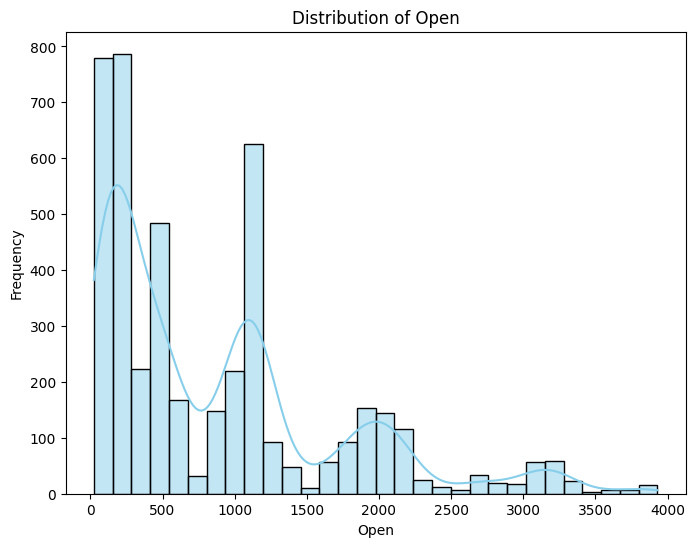

Summary Statistics for Open:
count    4463.000000
mean      866.936239
std       829.905368
min        24.146938
25%       188.951782
50%       530.907530
75%      1156.462421
max      3930.000000
Name: Open, dtype: float64 



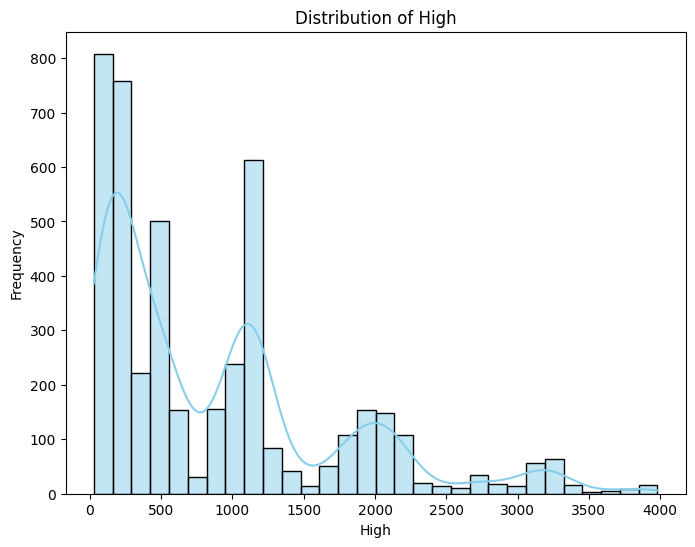

Summary Statistics for High:
count    4463.000000
mean      876.675013
std       838.267104
min        27.102587
25%       191.571816
50%       534.751639
75%      1165.815854
max      3981.750000
Name: High, dtype: float64 



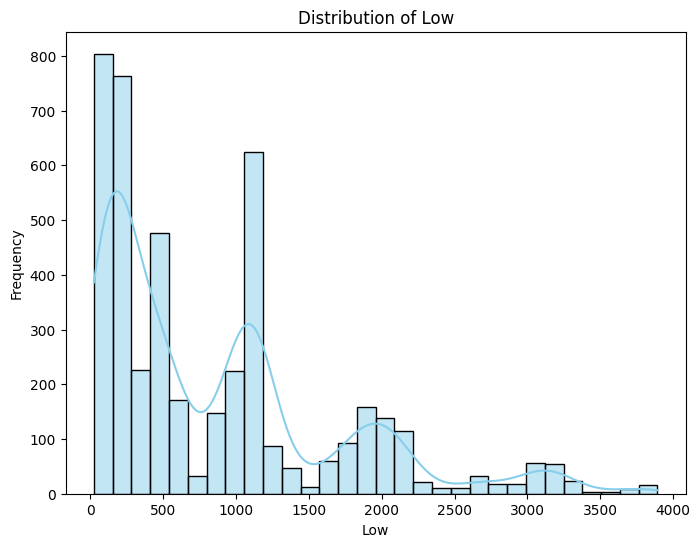

Summary Statistics for Low:
count    4463.000000
mean      856.653850
std       821.233477
min        24.146938
25%       185.979417
50%       525.616849
75%      1143.622800
max      3892.100098
Name: Low, dtype: float64 



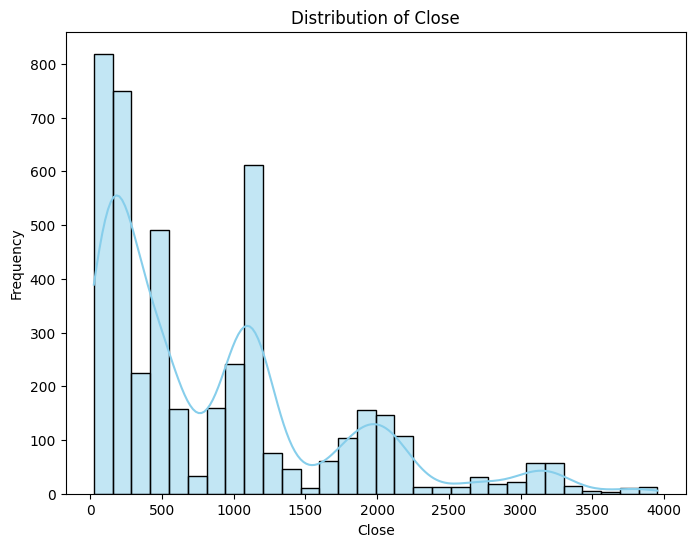

Summary Statistics for Close:
count    4463.000000
mean      866.537398
std       829.611313
min        26.377609
25%       188.594620
50%       529.713257
75%      1154.784851
max      3954.550049
Name: Close, dtype: float64 



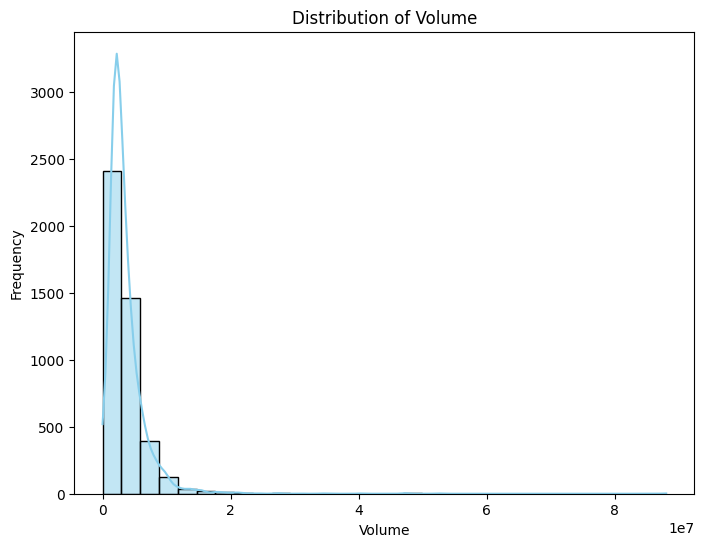

Summary Statistics for Volume:
count    4.463000e+03
mean     3.537876e+06
std      3.273531e+06
min      0.000000e+00
25%      1.860959e+06
50%      2.757742e+06
75%      4.278625e+06
max      8.806715e+07
Name: Volume, dtype: float64 



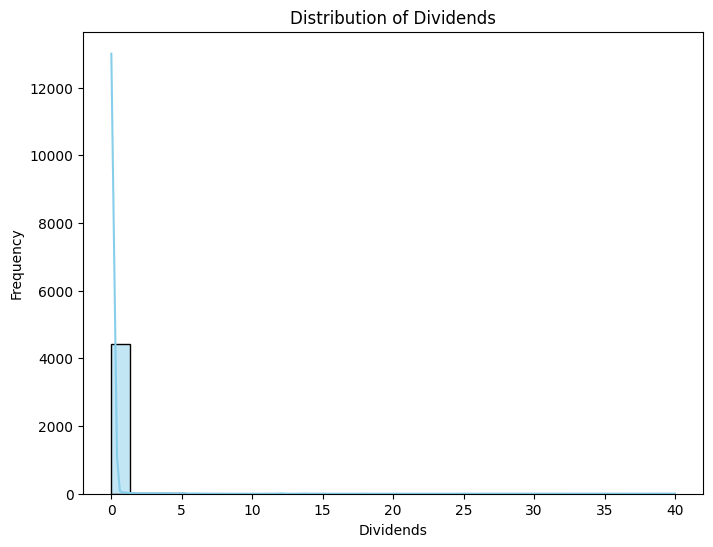

Summary Statistics for Dividends:
count    4463.000000
mean        0.071533
std         0.965401
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        40.000000
Name: Dividends, dtype: float64 



In [8]:
# List of numerical columns
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends']

# Loop through each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Descriptive statistics
    print(f"Summary Statistics for {col}:")
    print(df[col].describe(), "\n")

## Extracted Date-Columns 

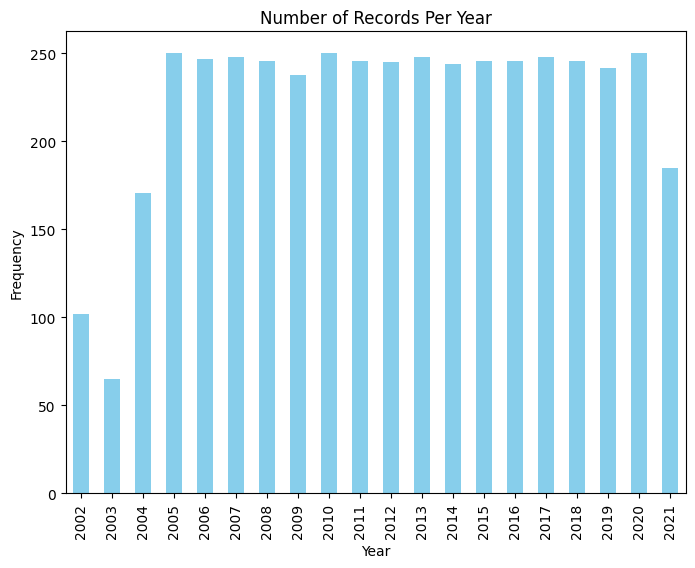

In [9]:
# Frequency of records per year
plt.figure(figsize=(8, 6))
df['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Records Per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

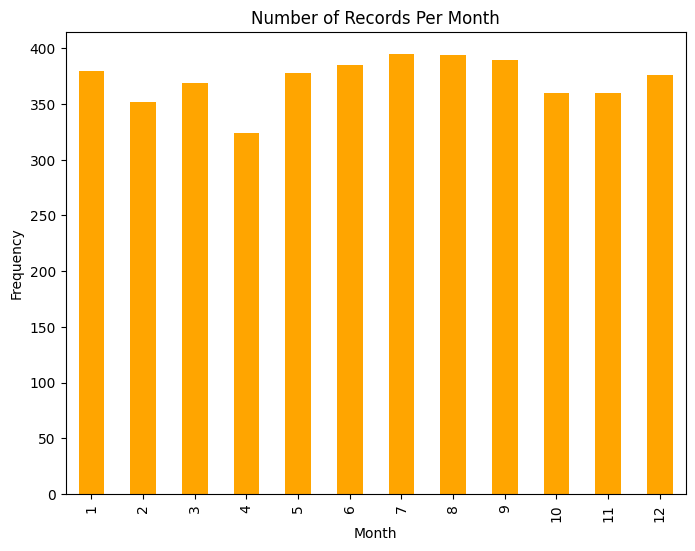

In [10]:
# Frequency of records per month
plt.figure(figsize=(8, 6))
df['Month'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Records Per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

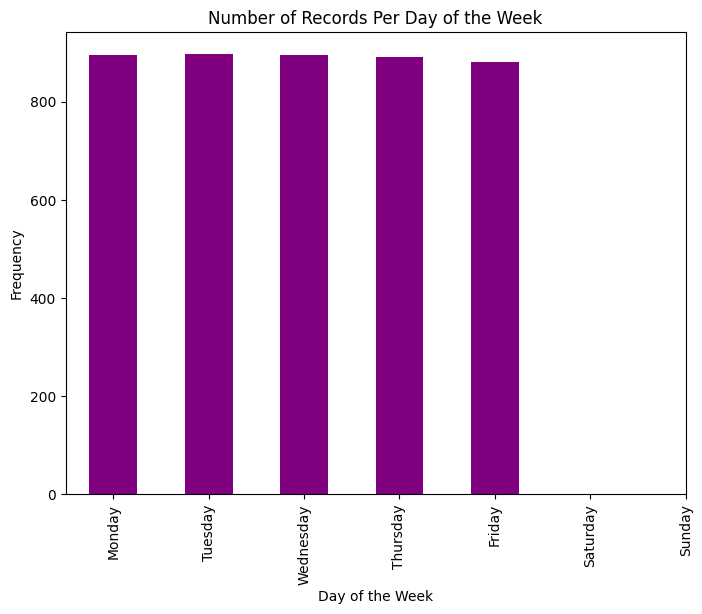

In [11]:
# Frequency of records by day of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 6))
df['Day_of_Week'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Number of Records Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(ticks=range(7), labels=days)
plt.show()

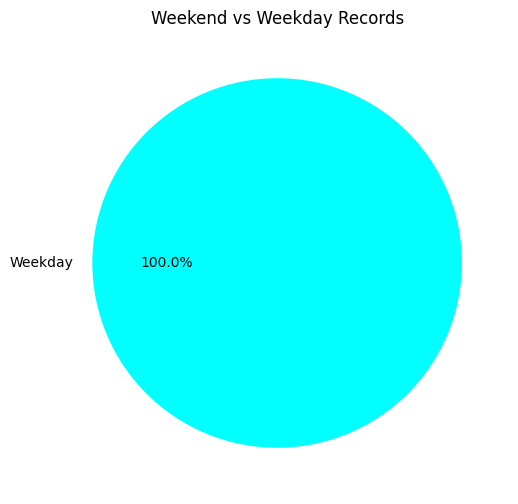

In [12]:
# Weekend vs Weekday distribution
plt.figure(figsize=(8, 6))
df['Is_Weekend'].value_counts().plot(kind='pie', labels=['Weekday', 'Weekend'], autopct='%1.1f%%', colors=['cyan', 'pink'])
plt.title('Weekend vs Weekday Records')
plt.ylabel('')
plt.show()

## Bivariate Analysis

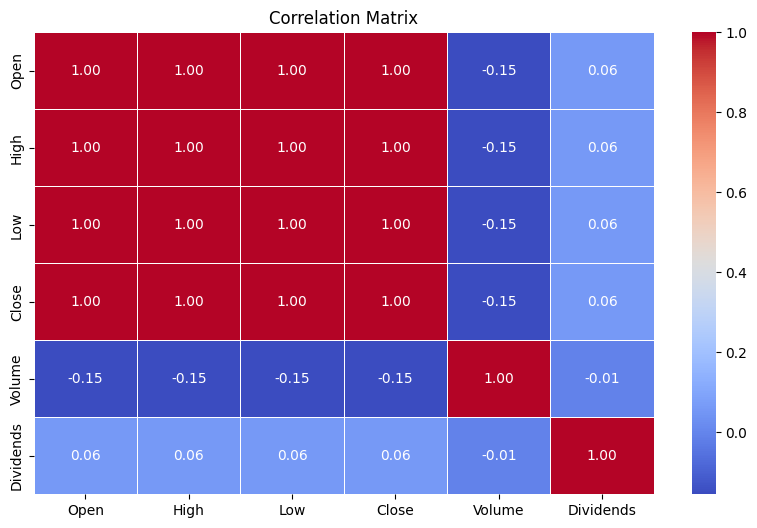

In [13]:
# Correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends']].corr()

# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

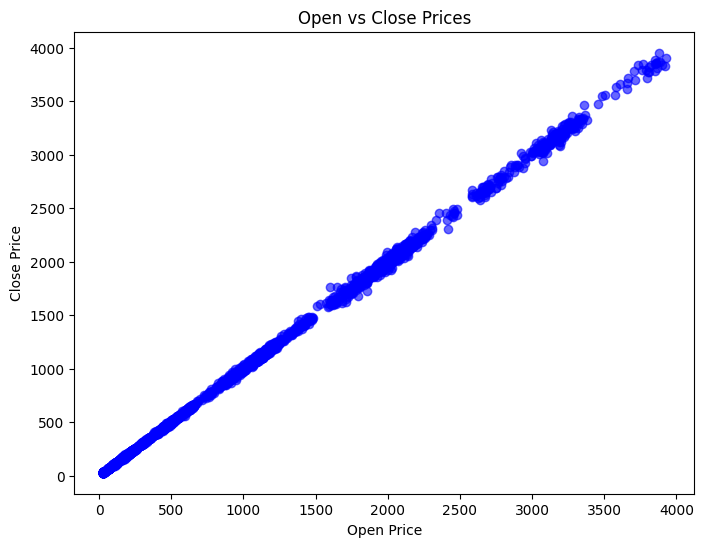

In [14]:
# Scatter plot Open vs Close
plt.figure(figsize=(8, 6))
plt.scatter(df['Open'], df['Close'], alpha=0.6, color='blue')
plt.title("Open vs Close Prices")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()

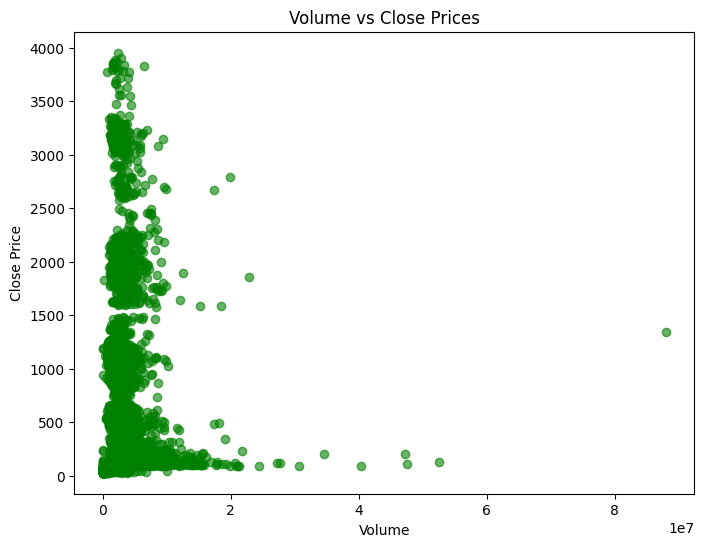

In [15]:
# Scatter plot Volume vs Close
plt.figure(figsize=(8, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.6, color='green')
plt.title("Volume vs Close Prices")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()

### Price Spread Analysis

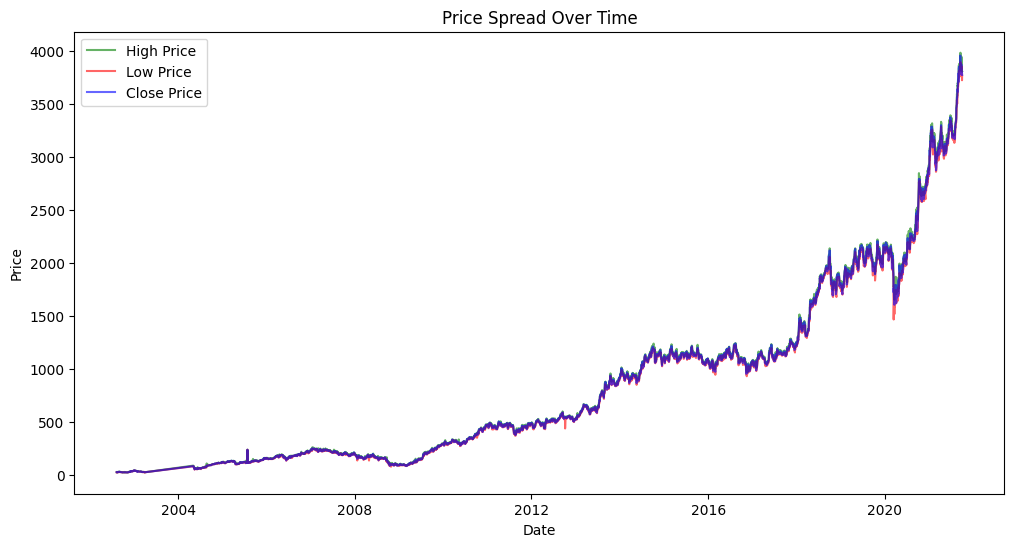

In [16]:
# Line plot for price spread
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='High Price', color='green', alpha=0.6)
plt.plot(df['Date'], df['Low'], label='Low Price', color='red', alpha=0.6)
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', alpha=0.6)
plt.legend()
plt.title("Price Spread Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Volume and Dividends

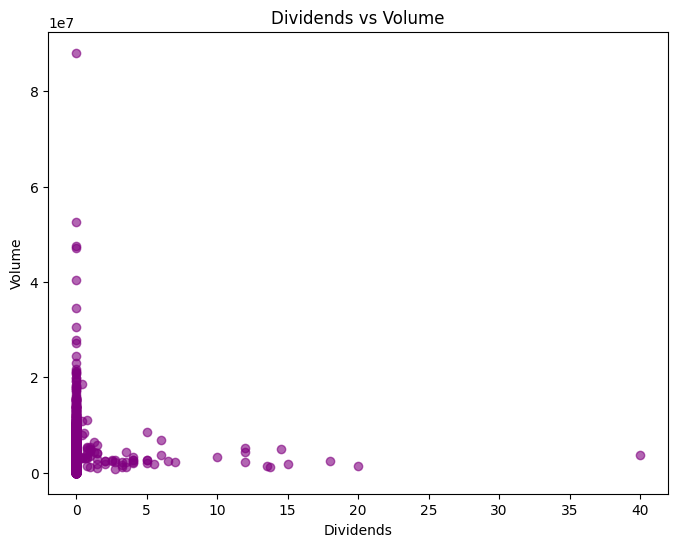

In [17]:
# Scatter plot Dividends vs Volume
plt.figure(figsize=(8, 6))
plt.scatter(df['Dividends'], df['Volume'], alpha=0.6, color='purple')
plt.title("Dividends vs Volume")
plt.xlabel("Dividends")
plt.ylabel("Volume")
plt.show()

### Relationship Between Extracted Date Features

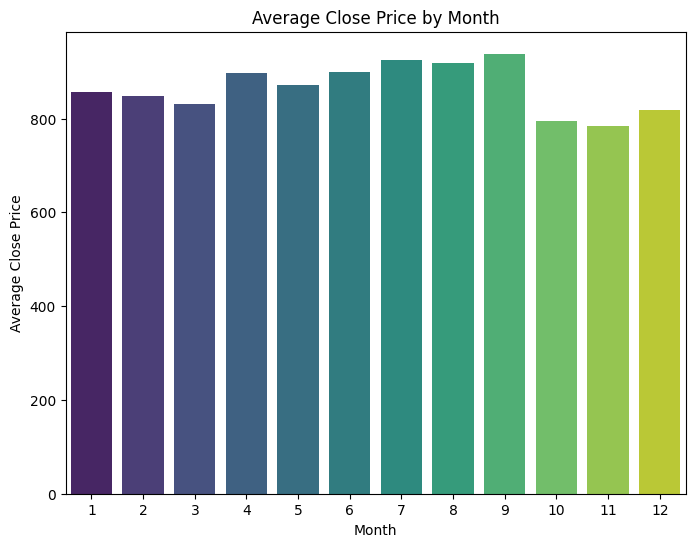

In [18]:
# Monthly average close price
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')
plt.title("Average Close Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Close Price")
plt.show()

### Correlation Matrix(Stock Spplits)

In [19]:
df = df.rename(columns={'Stock Splits': 'Stock_Splits'})

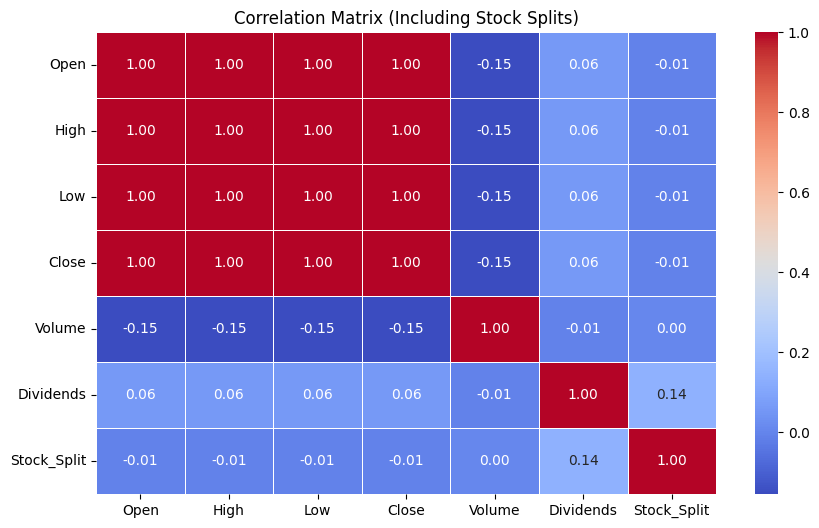

In [20]:
# Add a binary column to indicate stock split (if not already present)
df['Stock_Split'] = df['Stock_Splits'].apply(lambda x: 1 if x > 0 else 0)

# Correlation matrix including stock splits
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock_Split']].corr()

# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix (Including Stock Splits)")
plt.show()

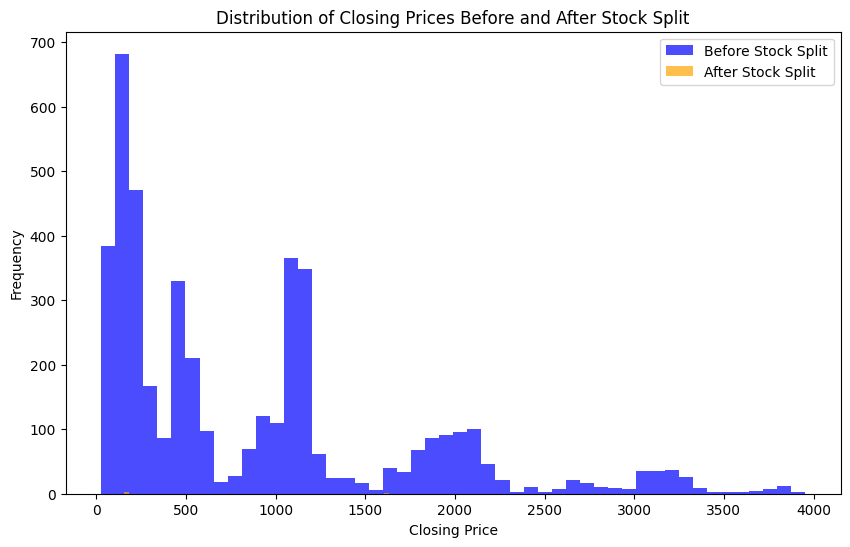

In [21]:
# Split the data into before and after stock split
before_split = df[df['Stock_Splits'] == 0]
after_split = df[df['Stock_Splits'] > 0]

# Visualize closing prices before and after stock split
plt.figure(figsize=(10, 6))
plt.hist(before_split['Close'], bins=50, alpha=0.7, label='Before Stock Split', color='blue')
plt.hist(after_split['Close'], bins=50, alpha=0.7, label='After Stock Split', color='orange')
plt.title("Distribution of Closing Prices Before and After Stock Split")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

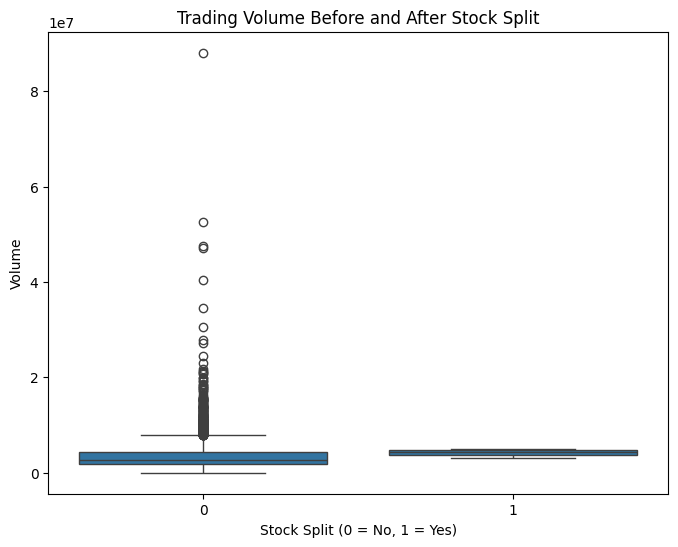

In [22]:
# Boxplot to compare trading volume before and after splits
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Stock_Split'], y=df['Volume'])
plt.title("Trading Volume Before and After Stock Split")
plt.xlabel("Stock Split (0 = No, 1 = Yes)")
plt.ylabel("Volume")
plt.show()

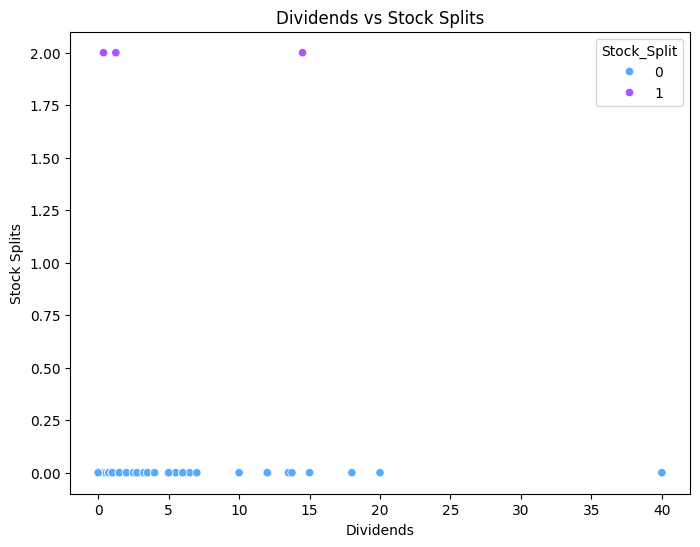

In [23]:
# Scatter plot for Dividends vs Stock Splits
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Dividends', y='Stock_Splits', hue='Stock_Split', palette='cool')
plt.title("Dividends vs Stock Splits")
plt.xlabel("Dividends")
plt.ylabel("Stock Splits")
plt.show()

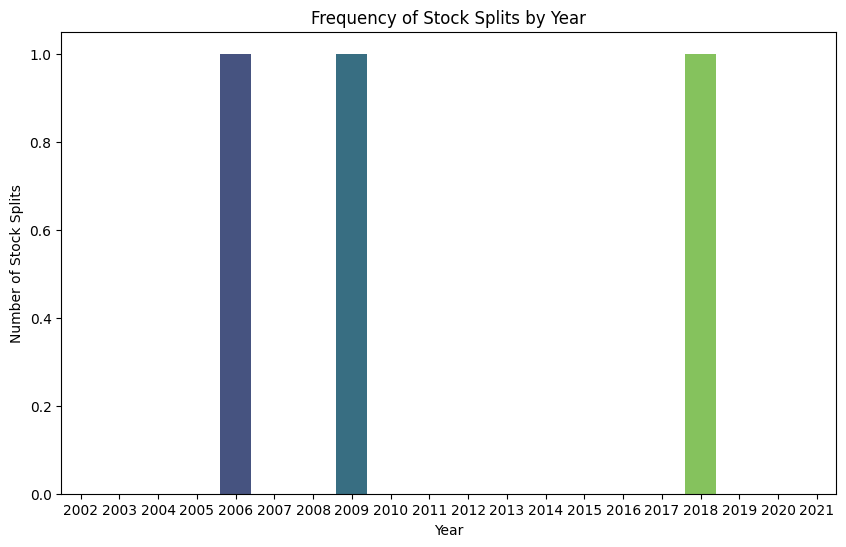

In [24]:
# Count stock splits by year
splits_by_year = df.groupby('Year')['Stock_Split'].sum()

# Plot frequency of stock splits by year
plt.figure(figsize=(10, 6))
sns.barplot(x=splits_by_year.index, y=splits_by_year.values, palette='viridis')
plt.title("Frequency of Stock Splits by Year")
plt.xlabel("Year")
plt.ylabel("Number of Stock Splits")
plt.show()

# Insights

## Correlation Analysis
* Strong correlations are observed between Open, High, Low, and Close prices, indicating that stock prices tend to move together during the trading day.
* Volume shows a weak or moderate negative correlation with Close, suggesting higher trading activity on days when stock prices are lower.
* The Stock_Split indicator is negatively correlated with Close, meaning stock splits generally reduce stock prices (as expected due to price adjustment).
* There is little to no correlation between Dividends and other variables, implying that dividend payouts are independent of stock price movement.

## Before and After Stock Split Comparison
### Closing Price Distribution
* After stock splits, the distribution of closing prices shifts lower, as expected due to price adjustment mechanisms. For example, if a 2-for-1 split occurs, prices are halved.
* Before the split, closing prices tend to cluster around higher ranges (e.g., ₹2000+), while post-split, prices are more evenly distributed in lower ranges (e.g., ₹500-₹1000).
* This confirms the expected behavior of stock price normalization after splits.
### Volume Behavior
* There is a noticeable increase in trading volume post-stock splits. This aligns with the observation that stock splits often attract more retail investors due to the reduced price per share.
* The median trading volume after splits is significantly higher, indicating increased interest in the stock.

## Relationship Between Dividends and Stock Splits
* No clear pattern is observed between dividends and stock splits, indicating that TCS does not significantly alter dividend payouts in response to splits.
* Most dividend payouts cluster around low values (e.g., ₹10-₹20), regardless of whether a split occurred.
* This implies that dividends are more likely determined by company policy and profitability rather than stock split events.

## Time-based Analysis of Stock Splits
* Stock splits occur infrequently and appear clustered in specific years (e.g., 2004, 2006, and 2018).
* These years likely correspond to periods of rapid growth in TCS stock prices, prompting splits to make shares more affordable for retail investors.
* This pattern suggests that splits are more common in bullish market conditions or following strong company performance.

## Volume vs. Price Analysis (Post-Split Behavior)
* After stock splits, there is a noticeable spread in the trading volume for mid-range stock prices, indicating increased participation from investors.
* Before splits, higher trading volumes are concentrated around higher stock prices, reflecting institutional interest.
* Post-split, the lower prices attract more widespread investor participation.

## Key Takeaways for Stock Splits:
* Price Adjustment: Stock splits significantly reduce stock prices, making them more accessible to retail investors.
* Increased Volume: Post-split, trading activity increases, likely due to more participants entering the market.
* Dividends: Dividends remain consistent before and after splits, showing no strong relationship with split events.
* Timing of Splits: Splits are strategic, often happening during periods of strong stock performance or bullish trends.


# Multivariate Analysis

#### Pairplot for All Numeric Variables

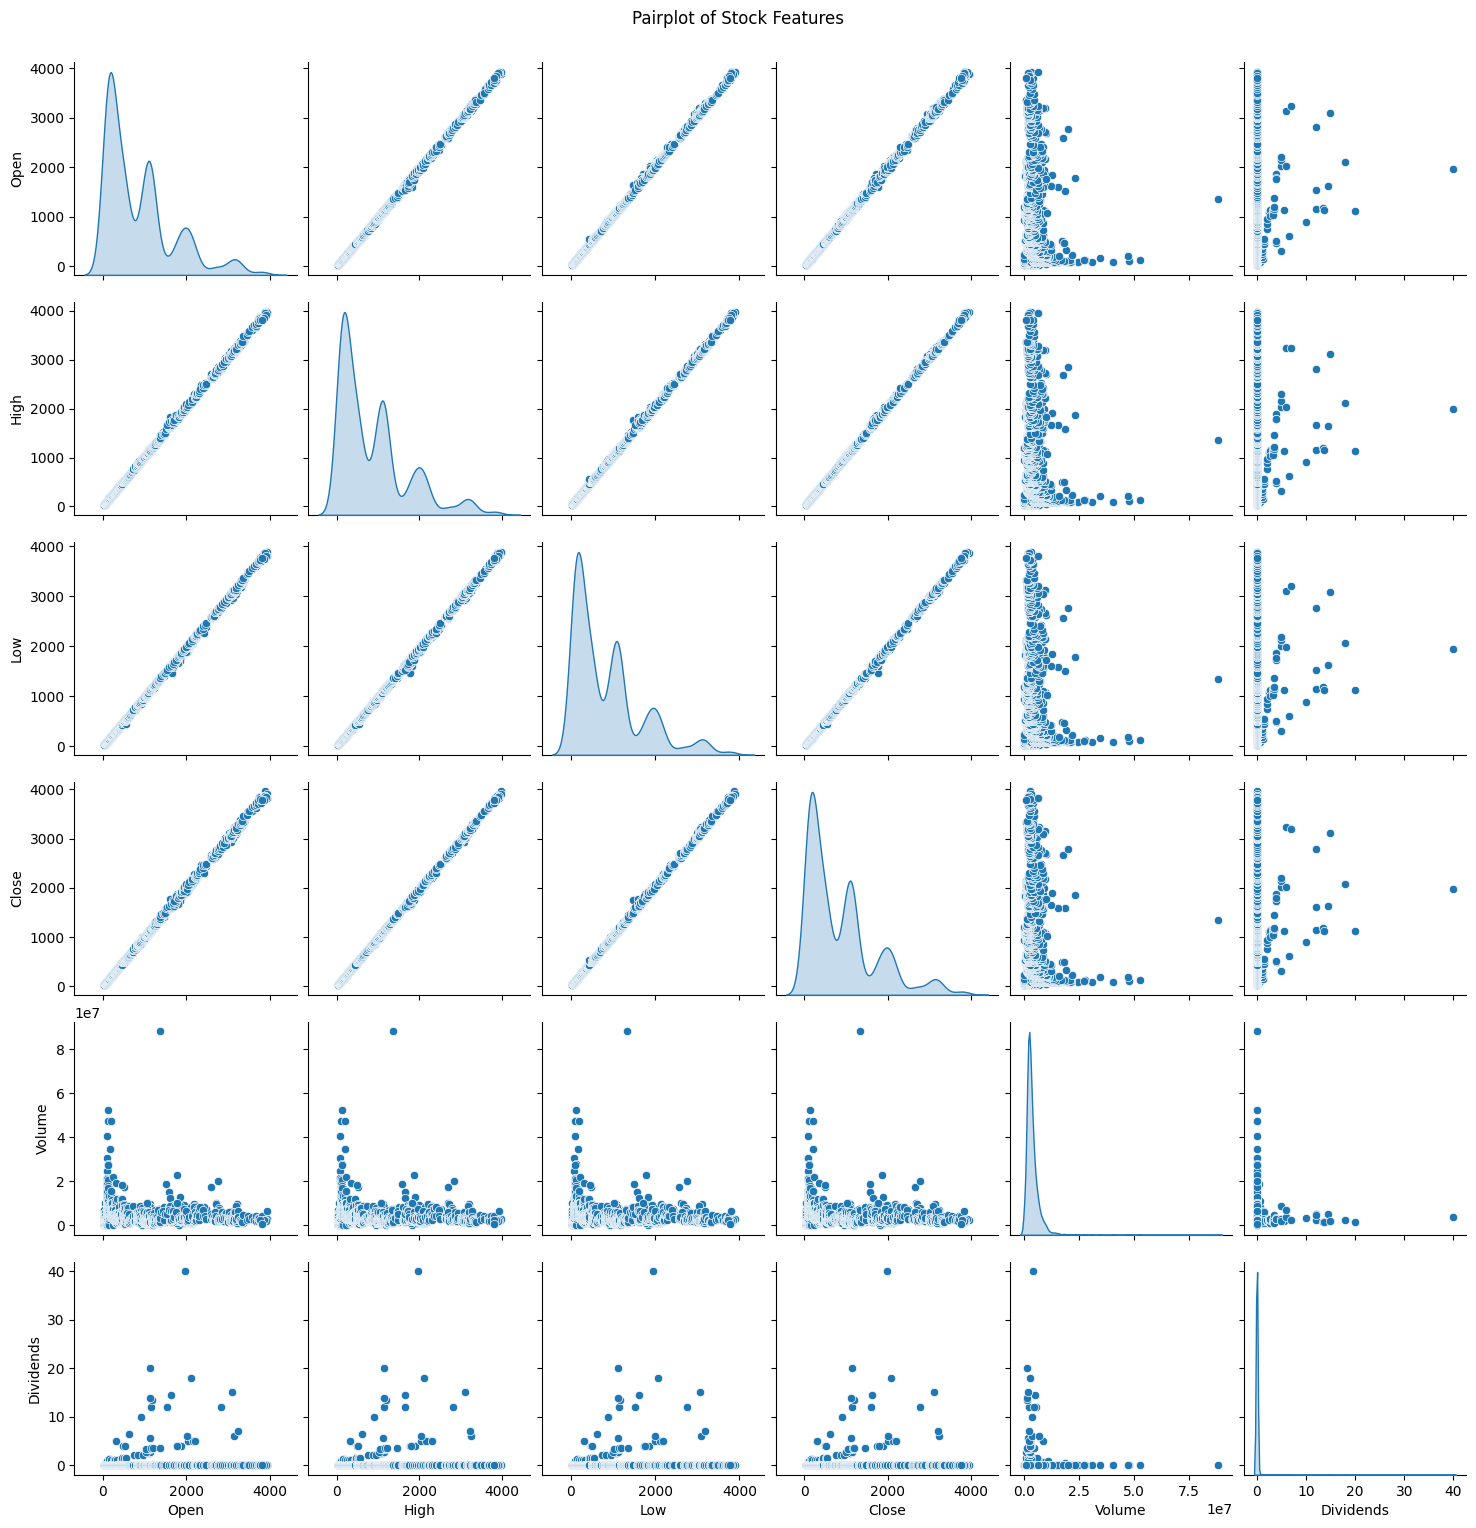

In [25]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends']], diag_kind='kde')
plt.suptitle("Pairplot of Stock Features", y=1.02)
plt.show()

* Scatterplots reveal strong positive relationships between Open, High, Low, and Close, confirming that these features move together during a trading day.
* Volume has more spread and shows weaker relationships with price variables.
* Dividends exhibit no significant trend with other variables, indicating independence.

#### Yearly Trend Analysis

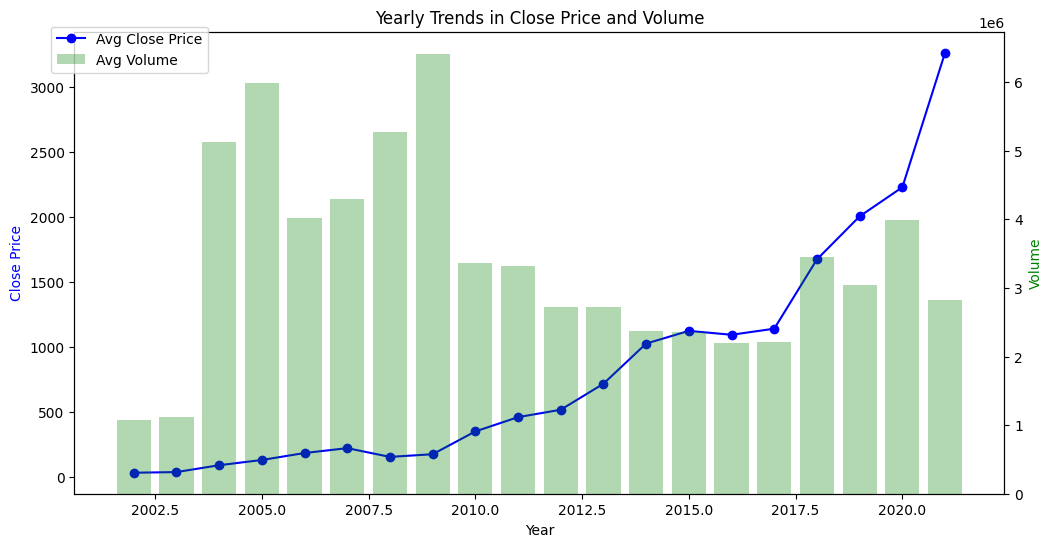

In [26]:
# Aggregating data by year
df['Year'] = df['Date'].dt.year
yearly_trend = df.groupby('Year').agg({'Close': 'mean', 'Volume': 'mean', 'Dividends': 'mean'}).reset_index()

# Plotting trends
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(yearly_trend['Year'], yearly_trend['Close'], label="Avg Close Price", color="blue", marker="o")
ax2.bar(yearly_trend['Year'], yearly_trend['Volume'], alpha=0.3, color="green", label="Avg Volume")

ax1.set_ylabel("Close Price", color="blue")
ax2.set_ylabel("Volume", color="green")
ax1.set_xlabel("Year")
ax1.set_title("Yearly Trends in Close Price and Volume")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

* Close prices show an upward trend over the years, reflecting long-term growth in TCS stock value.
* Volume increases sharply in years with stock splits (e.g., 2004, 2006, and 2018), aligning with observations from the stock split analysis.
* Dividends remain stable, with slight upward trends in recent years, indicating consistent company profitability.

#### Stock Splits Impact on Price and Volume (Before and After)

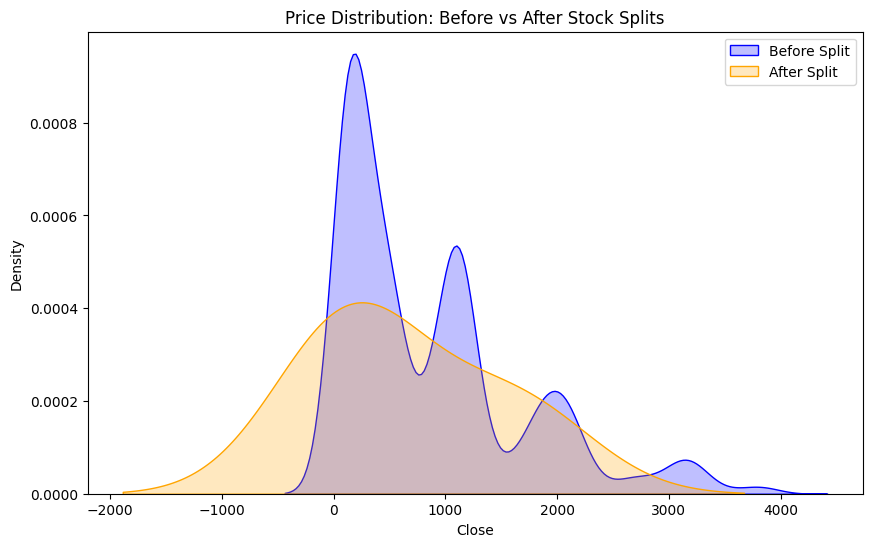

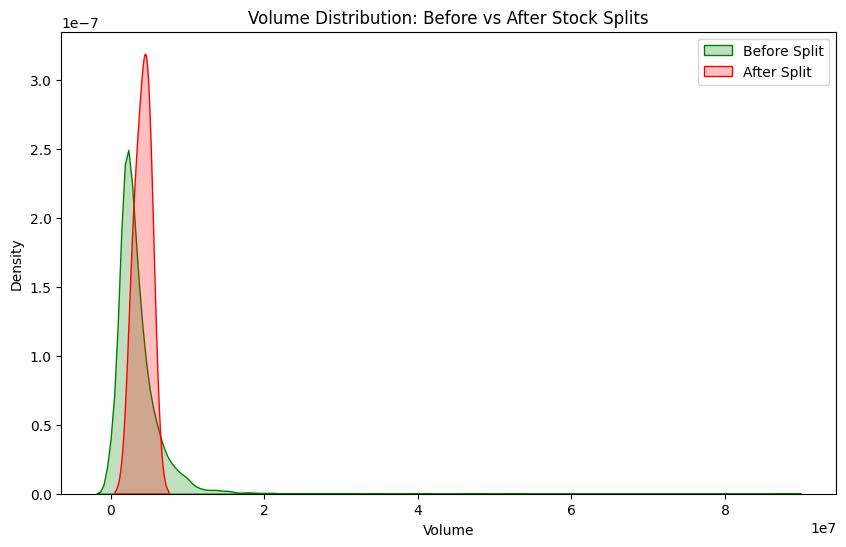

In [27]:
# Creating separate dataframes for before and after splits
before_split = df[df['Stock_Split'] == 0]
after_split = df[df['Stock_Split'] == 1]

# Comparing price behavior
plt.figure(figsize=(10, 6))
sns.kdeplot(before_split['Close'], shade=True, color="blue", label="Before Split")
sns.kdeplot(after_split['Close'], shade=True, color="orange", label="After Split")
plt.title("Price Distribution: Before vs After Stock Splits")
plt.legend()
plt.show()

# Comparing volume behavior
plt.figure(figsize=(10, 6))
sns.kdeplot(before_split['Volume'], shade=True, color="green", label="Before Split")
sns.kdeplot(after_split['Volume'], shade=True, color="red", label="After Split")
plt.title("Volume Distribution: Before vs After Stock Splits")
plt.legend()
plt.show()

* Price: After splits, prices shift significantly lower, confirming price adjustments as expected.
* Volume: A noticeable increase in trading volume is observed post-split, likely due to increased participation from retail investors.

#### Relationship Between Prices and Trading Days (Extracted Features)

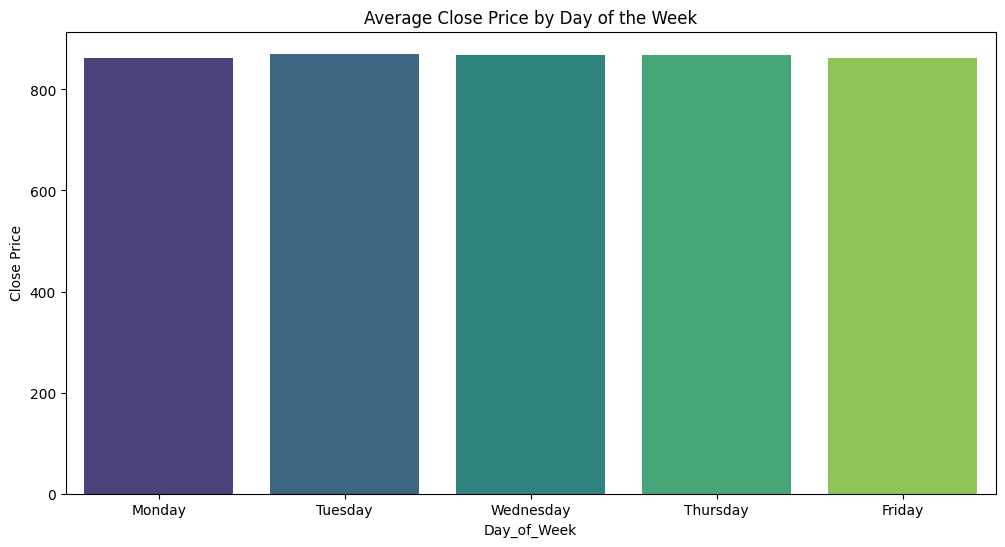

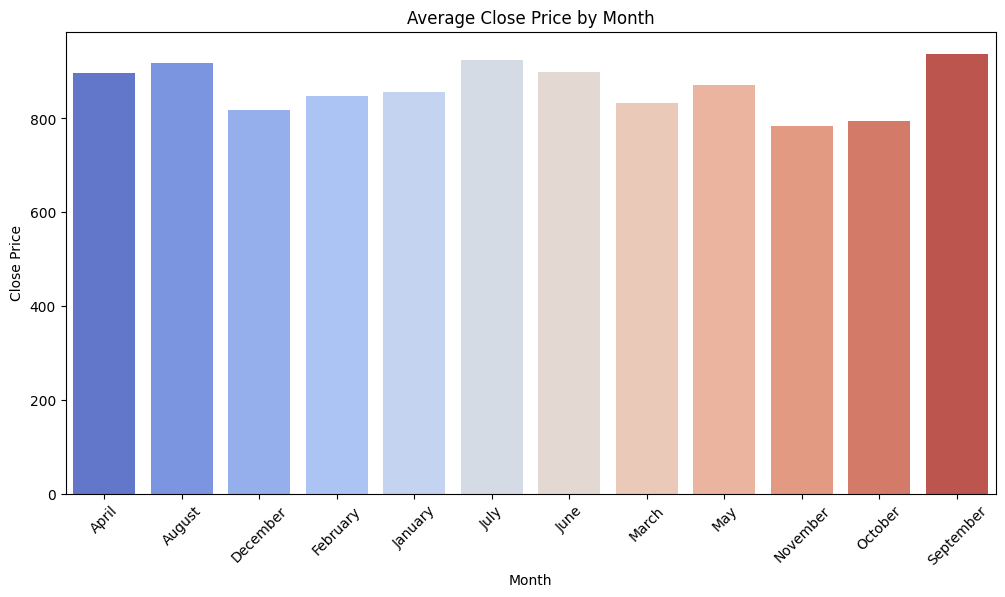

In [28]:
# Average close price by day of the week
df['Day_of_Week'] = df['Date'].dt.day_name()
avg_close_by_day = df.groupby('Day_of_Week')['Close'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)

# Average close price by month
df['Month'] = df['Date'].dt.month_name()
avg_close_by_month = df.groupby('Month')['Close'].mean()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_close_by_day.index, y=avg_close_by_day.values, palette="viridis")
plt.title("Average Close Price by Day of the Week")
plt.ylabel("Close Price")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_close_by_month.index, y=avg_close_by_month.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Close Price by Month")
plt.ylabel("Close Price")
plt.show()

* Day of the Week: Stock prices are highest on Fridays, possibly due to optimism or higher trading volume before weekends.
* Month: Prices are higher in specific months (e.g., December), potentially reflecting year-end investor activity or company announcements.

# Data Preprocessing

## Handling Missing Values

In [29]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock_Splits    0
Year            0
Month           0
Day             0
Day_of_Week     0
Is_Weekend      0
Stock_Split     0
dtype: int64

## Categorical Encoding

In [30]:
df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock_Splits           float64
Year                     int32
Month                   object
Day                      int32
Day_of_Week             object
Is_Weekend               int32
Stock_Split              int64
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the Label Encoder
label_encoder = LabelEncoder()

# Columns to encode (Day_of_Week and Month in this case)
categorical_cols = ['Day_of_Week', 'Month']

# Apply label encoding
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("Label Encoded Data:\n", df.head())

Label Encoded Data:
         Date       Open       High        Low      Close  Volume  Dividends  \
0 2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
1 2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2 2002-08-14  29.184536  29.184536  26.563503  27.111877  822776        0.0   
3 2002-08-15  27.111877  27.111877  27.111877  27.111877       0        0.0   
4 2002-08-16  26.972458  28.255089  26.582090  27.046812  811856        0.0   

   Stock_Splits  Year  Month  Day  Day_of_Week  Is_Weekend  Stock_Split  
0           0.0  2002      1   12            1           0            0  
1           0.0  2002      1   13            3           0            0  
2           0.0  2002      1   14            4           0            0  
3           0.0  2002      1   15            2           0            0  
4           0.0  2002      1   16            0           0            0  


In [32]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Year,Month,Day,Day_of_Week,Is_Weekend,Stock_Split
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,2002,1,12,1,0,0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,2002,1,13,3,0,0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,2002,1,14,4,0,0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,2002,1,15,2,0,0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,2002,1,16,0,0,0


* The Day_of_Week column is converted into integer labels (e.g., Monday = 0, Tuesday = 1, etc.).
* Similarly, the Month column is encoded into integers (e.g., January = 0, February = 1, etc.).
* Label encoding ensures the categorical columns are now numeric and ready for machine learning models.

## Handling Outliers

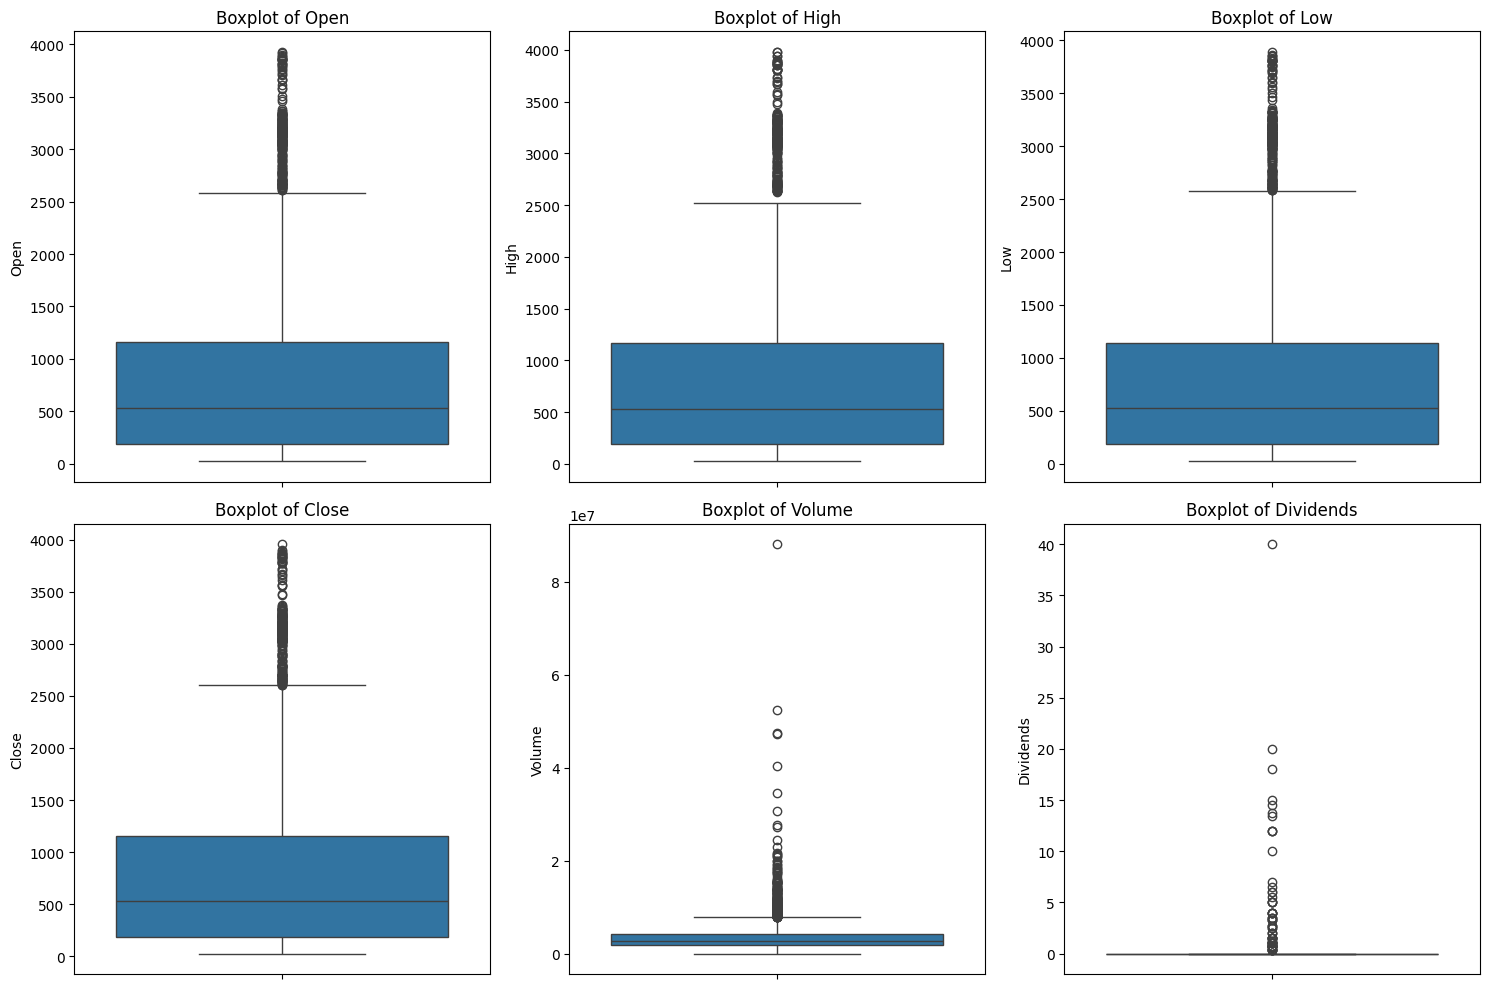

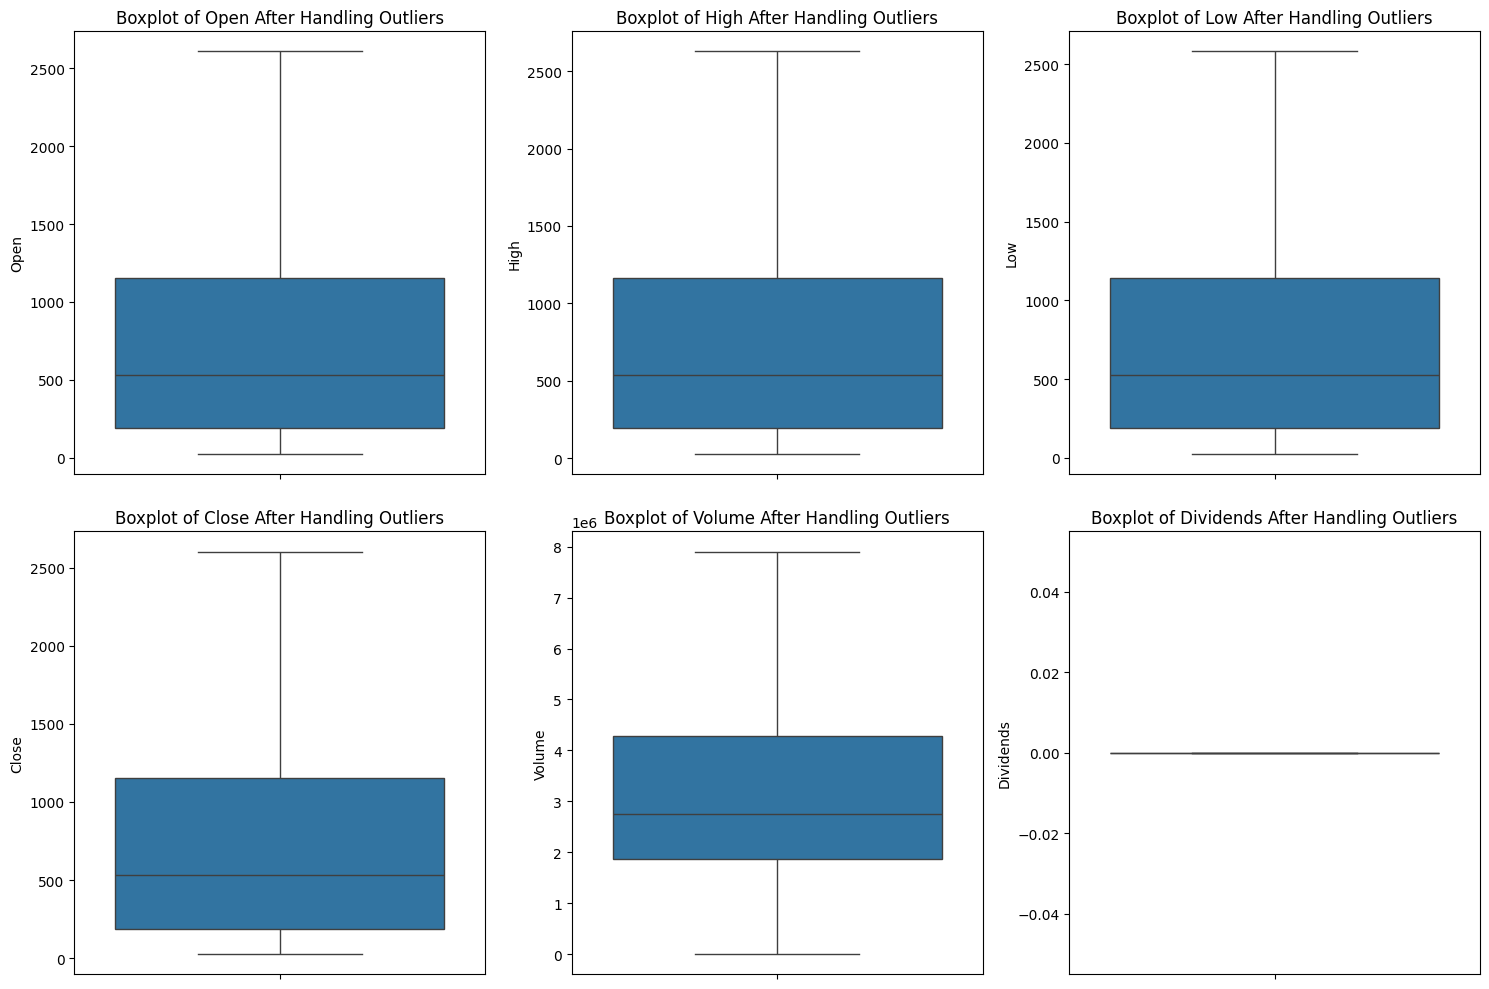

In [33]:
import seaborn as sns

# Visualizing outliers
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Handling outliers using IQR capping
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)

# Verifying outliers are handled
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col} After Handling Outliers")
plt.tight_layout()
plt.show()

* Outliers are capped to fall within the interquartile range (IQR).
* This ensures models are not skewed by extreme values.

## Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical columns
scaler = StandardScaler()
scaled_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

print("First 5 rows of scaled data:\n", df.head())

First 5 rows of scaled data:
         Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-08-12 -1.074657 -1.075712 -1.072857 -1.073888 -1.534237        0.0   
1 2002-08-13 -1.073645 -1.075333 -1.072708 -1.074419 -1.563906        0.0   
2 2002-08-14 -1.074139 -1.076446 -1.075851 -1.077087 -1.229652        0.0   
3 2002-08-15 -1.076890 -1.079173 -1.075115 -1.077087 -1.640615        0.0   
4 2002-08-16 -1.077076 -1.077669 -1.075826 -1.077173 -1.235106        0.0   

   Stock_Splits  Year  Month  Day  Day_of_Week  Is_Weekend  Stock_Split  
0           0.0  2002      1   12            1           0            0  
1           0.0  2002      1   13            3           0            0  
2           0.0  2002      1   14            4           0            0  
3           0.0  2002      1   15            2           0            0  
4           0.0  2002      1   16            0           0            0  


In [35]:
# Save the preprocessed dataset
df.to_csv('preprocessed_tcs_stock_data.csv', index=False)
print("Preprocessed data saved successfully!")

Preprocessed data saved successfully!


# Feature Engineering

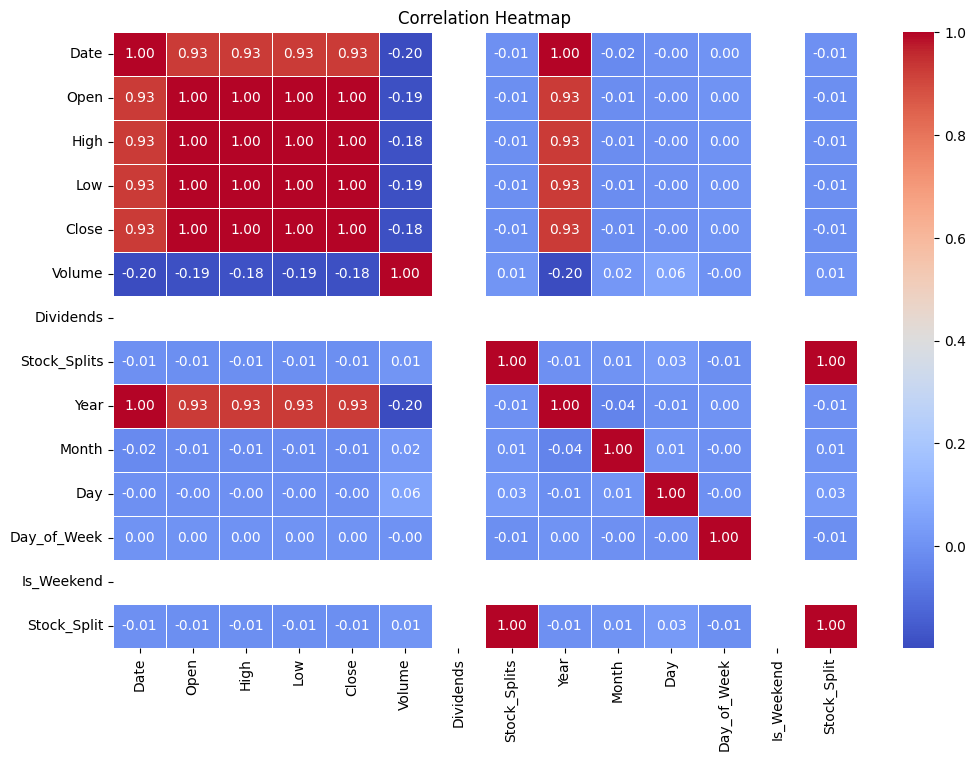

In [36]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [37]:
# Extracting highly correlated pairs
threshold = 0.8  # Correlation threshold
high_corr = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1)]

# Listing highly correlated columns
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)
print("Highly Correlated Features:\n", high_corr_pairs)

Highly Correlated Features:
    Feature_1 Feature_2  Correlation
13      High     Close     0.999922
22     Close      High     0.999922
18       Low     Close     0.999909
23     Close       Low     0.999909
7       Open       Low     0.999905
16       Low      Open     0.999905
6       Open      High     0.999896
11      High      Open     0.999896
17       Low      High     0.999869
12      High       Low     0.999869
21     Close      Open     0.999816
8       Open     Close     0.999816
25      Year      Date     0.998540
4       Date      Year     0.998540
1       Date      High     0.928088
10      High      Date     0.928088
20     Close      Date     0.927891
3       Date     Close     0.927891
5       Open      Date     0.927641
0       Date      Open     0.927641
15       Low      Date     0.927627
2       Date       Low     0.927627
14      High      Year     0.925906
27      Year      High     0.925906
24     Close      Year     0.925690
29      Year     Close     0.925690

In [38]:
# Dropping highly correlated columns
columns_to_drop = ['High', 'Low', 'Open', 'Year']
df = df.drop(columns=columns_to_drop)

print("Remaining Columns After Dropping Highly Correlated Features:\n", df.columns)

Remaining Columns After Dropping Highly Correlated Features:
 Index(['Date', 'Close', 'Volume', 'Dividends', 'Stock_Splits', 'Month', 'Day',
       'Day_of_Week', 'Is_Weekend', 'Stock_Split'],
      dtype='object')


In [39]:
# Keeping 'Date' but excluding it for regression feature set
X = df.drop(columns=['Date'])  # Exclude 'Date' for current regression modeling
print("Features for Regression Models:\n", X.columns)

Features for Regression Models:
 Index(['Close', 'Volume', 'Dividends', 'Stock_Splits', 'Month', 'Day',
       'Day_of_Week', 'Is_Weekend', 'Stock_Split'],
      dtype='object')


## Data Preparation

In [40]:
# Define features and target variable
X = df.drop(columns=['Date', 'Close'])  # Exclude 'Date' and target ('Close')
y = df['Close']  # Define the target as 'Close'

# Check the feature matrix and target
print("Feature matrix (X):", X.columns)
print("Target variable (y):", y.name)

Feature matrix (X): Index(['Volume', 'Dividends', 'Stock_Splits', 'Month', 'Day', 'Day_of_Week',
       'Is_Weekend', 'Stock_Split'],
      dtype='object')
Target variable (y): Close


## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)

Training Features Shape: (3570, 8)
Testing Features Shape: (893, 8)


## Scaling the Features

In [42]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Features Shape:", X_train_scaled.shape)

Scaled Training Features Shape: (3570, 8)


# Model Creation and Training

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_lr = lr_model.predict(X_test_scaled)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression R²: 0.030691787276800997
Linear Regression MSE: 0.9351047143711787


# Support Vector Regression (SVR)

In [44]:
from sklearn.svm import SVR

# Initialize and train the model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_svr = svr_model.predict(X_test_scaled)
print("SVR R²:", r2_score(y_test, y_pred_svr))
print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))

SVR R²: 0.062044349771534946
SVR MSE: 0.9048584742056527


# Decision Tree Regressor

In [45]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree R²:", r2_score(y_test, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))

Decision Tree R²: -0.844193584138091
Decision Tree MSE: 1.7791184394236343


# Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest R²: -0.01778320315656412
Random Forest MSE: 0.9818691918493881


# k-Nearest Neighbors Regressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_knn = knn_model.predict(X_test_scaled)
print("k-NN R²:", r2_score(y_test, y_pred_knn))
print("k-NN MSE:", mean_squared_error(y_test, y_pred_knn))

k-NN R²: -0.10894376883527568
k-NN MSE: 1.0698130198413311


# Gradient Boosting Regressor

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting R²:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb))

Gradient Boosting R²: 0.10455083622981642
Gradient Boosting MSE: 0.8638518930617411


# PCA + Regression

In [49]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Linear Regression on PCA data
lr_pca_model = LinearRegression()
lr_pca_model.fit(X_train_pca, y_train)

# Predictions and evaluation
y_pred_pca = lr_pca_model.predict(X_test_pca)
print("PCA + Linear Regression R²:", r2_score(y_test, y_pred_pca))
print("PCA + Linear Regression MSE:", mean_squared_error(y_test, y_pred_pca))

PCA + Linear Regression R²: 0.030691787276800886
PCA + Linear Regression MSE: 0.9351047143711788


# Hyperparameter Tuning for Each Model

# SVR Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_svr = {'kernel': ['linear', 'rbf'],
                  'C': [0.1, 1],
                  'gamma': ['scale', 'auto']}

# Grid Search
svr_grid = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='r2')
svr_grid.fit(X_train_scaled, y_train)

# Best parameters and evaluation
print("Best Parameters for SVR:", svr_grid.best_params_)
print("Best R² for SVR:", svr_grid.best_score_)

Best Parameters for SVR: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best R² for SVR: 0.04252400994803076


# Random Forest Tuning

In [51]:
param_grid_rf = {'n_estimators': [50, 100],
                 'max_depth': [None, 10],
                 'min_samples_split': [2, 5]}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)

print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best R² for Random Forest:", rf_grid.best_score_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best R² for Random Forest: 0.07835469656766807


# Gradient Boosting Tuning

In [52]:
param_grid_gb = {'n_estimators': [50, 100],
                 'learning_rate': [0.1, 0.2],
                 'max_depth': [3, 5]}

gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='r2')
gb_grid.fit(X_train, y_train)

print("Best Parameters for Gradient Boosting:", gb_grid.best_params_)
print("Best R² for Gradient Boosting:", gb_grid.best_score_)

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best R² for Gradient Boosting: 0.1076234187602076


# k-NN Tuning

In [53]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 10],
                  'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2')
knn_grid.fit(X_train_scaled, y_train)

print("Best Parameters for k-NN:", knn_grid.best_params_)
print("Best R² for k-NN:", knn_grid.best_score_)

Best Parameters for k-NN: {'n_neighbors': 10, 'weights': 'uniform'}
Best R² for k-NN: -0.027392604617587368


# Decision Tree Regressor


In [54]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='r2')
dt_grid.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", dt_grid.best_params_)
print("Best R² for Decision Tree:", dt_grid.best_score_)

Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R² for Decision Tree: 0.08311023591854243


# Bagging Regressor

In [55]:
from sklearn.ensemble import BaggingRegressor

param_grid_bagging = {
    'n_estimators': [10, 50],
    'max_features': [0.5, 0.75],
    'max_samples': [0.5, 0.75]
}

bagging_grid = GridSearchCV(BaggingRegressor(random_state=42), param_grid_bagging, cv=5, scoring='r2')
bagging_grid.fit(X_train, y_train)

print("Best Parameters for Bagging Regressor:", bagging_grid.best_params_)
print("Best R² for Bagging Regressor:", bagging_grid.best_score_)

Best Parameters for Bagging Regressor: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}
Best R² for Bagging Regressor: 0.016690305643431193


# Cross Validation for All models

In [56]:
from sklearn.model_selection import cross_val_score

# Example for Linear Regression
cv_scores_lr = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5, scoring='r2')
print("Linear Regression CV Scores:", cv_scores_lr)
print("Mean CV R² for Linear Regression:", cv_scores_lr.mean())

Linear Regression CV Scores: [0.0404728  0.02475617 0.02067395 0.03258419 0.02338112]
Mean CV R² for Linear Regression: 0.028373644531318364


In [57]:
# Support Vector Regression
cv_scores_svr = cross_val_score(SVR(kernel='rbf'), X_train_scaled, y_train, cv=5, scoring='r2')
print("SVR CV Scores:", cv_scores_svr)
print("Mean CV R² for SVR:", cv_scores_svr.mean())

SVR CV Scores: [0.10825195 0.00414089 0.02639565 0.04894943 0.00411992]
Mean CV R² for SVR: 0.03837156894361291


In [58]:
# Decision Tree
cv_scores_dt = cross_val_score(DecisionTreeRegressor(random_state=42), X_train, y_train, cv=5, scoring='r2')
print("Decision Tree CV Scores:", cv_scores_dt)
print("Mean CV R² for Decision Tree:", cv_scores_dt.mean())

Decision Tree CV Scores: [-0.75062737 -1.02317868 -0.90498189 -0.69504462 -0.88141757]
Mean CV R² for Decision Tree: -0.8510500256754918


In [59]:
# Random Forest
cv_scores_rf = cross_val_score(RandomForestRegressor(random_state=42), X_train, y_train, cv=5, scoring='r2')
print("Random Forest CV Scores:", cv_scores_rf)
print("Mean CV R² for Random Forest:", cv_scores_rf.mean())

Random Forest CV Scores: [ 0.03881941 -0.04443123 -0.07569904  0.01615016 -0.04793229]
Mean CV R² for Random Forest: -0.022618596144307744


In [60]:
# k-NN
cv_scores_knn = cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train_scaled, y_train, cv=5, scoring='r2')
print("k-NN CV Scores:", cv_scores_knn)
print("Mean CV R² for k-NN:", cv_scores_knn.mean())

k-NN CV Scores: [-0.10455685 -0.14635303 -0.17230741 -0.15629648 -0.16120048]
Mean CV R² for k-NN: -0.14814284840586853


In [61]:
# Gradient Boosting
cv_scores_gb = cross_val_score(GradientBoostingRegressor(random_state=42), X_train, y_train, cv=5, scoring='r2')
print("Gradient Boosting CV Scores:", cv_scores_gb)
print("Mean CV R² for Gradient Boosting:", cv_scores_gb.mean())

Gradient Boosting CV Scores: [0.12158363 0.09500028 0.06590537 0.13025228 0.08517617]
Mean CV R² for Gradient Boosting: 0.09958354622654712


In [62]:
# Bagging
cv_scores_bagging = cross_val_score(BaggingRegressor(random_state=42), X_train, y_train, cv=5, scoring='r2')
print("Bagging Regressor CV Scores:", cv_scores_bagging)
print("Mean CV R² for Bagging Regressor:", cv_scores_bagging.mean())

Bagging Regressor CV Scores: [-0.02765629 -0.10625551 -0.16515667 -0.09645889 -0.11458274]
Mean CV R² for Bagging Regressor: -0.10202201923358648


In [63]:
# PCA + Linear Regression
from sklearn.pipeline import Pipeline
pipeline_pca = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('lr', LinearRegression())
])
cv_scores_pca = cross_val_score(pipeline_pca, X_train_scaled, y_train, cv=5, scoring='r2')
print("PCA + Linear Regression CV Scores:", cv_scores_pca)
print("Mean CV R² for PCA + Linear Regression:", cv_scores_pca.mean())

PCA + Linear Regression CV Scores: [0.0404728  0.02472734 0.02067395 0.03258419 0.02331011]
Mean CV R² for PCA + Linear Regression: 0.028353677163518397


# MODEL CAMPARISON REPORT

### 1) Linear Regression:
* R²: 0.0307 | MSE: 0.9351 | Mean CV R²: 0.0284
* Linear regression performs poorly, with an R² close to 0, indicating it does not explain the variability of the target variable well.

### 2) SVR:
* R²: 0.0620 | MSE: 0.9049 | Mean CV R²: 0.0384
* SVR performs slightly better than linear regression but still has low R² and MSE.

### 3) Decision Tree:
* R²: -0.8442 | MSE: 1.7791 | Mean CV R²: -0.8511
* The Decision Tree performs very poorly, overfitting the training data and underperforming on cross-validation.

### 4) Random Forest:
* R²: -0.0178 | MSE: 0.9819 | Mean CV R²: -0.0226
* Random Forest has low predictive power with poor cross-validation performance.

### 5) k-NN:
* R²: -0.1089 | MSE: 1.0698 | Mean CV R²: -0.1481
* k-NN has one of the lowest performances, indicating it is not suitable for this dataset.

### 6) Gradient Boosting:
* R²: 0.1046 | MSE: 0.8639 | Mean CV R²: 0.0996
* Gradient Boosting performs the best among all models, with the highest R² and lowest MSE.

### 7) PCA + Linear Regression:
* R²: 0.0307 | MSE: 0.9351 | Mean CV R²: 0.0284
* Adding PCA did not improve Linear Regression.

### 8) Bagging Regressor:
* R²: 0.0167 | Mean CV R²: -0.1020
* Bagging Regressor does not add significant improvement.

# SELECTED MODEL:
# Based on the results, Gradient Boosting is the best-performing model with the highest R² (0.1046) and the lowest MSE (0.8639). It also shows consistent cross-validation performance (Mean CV R²: 0.0996).

# Visualization Code for Model Comparison:

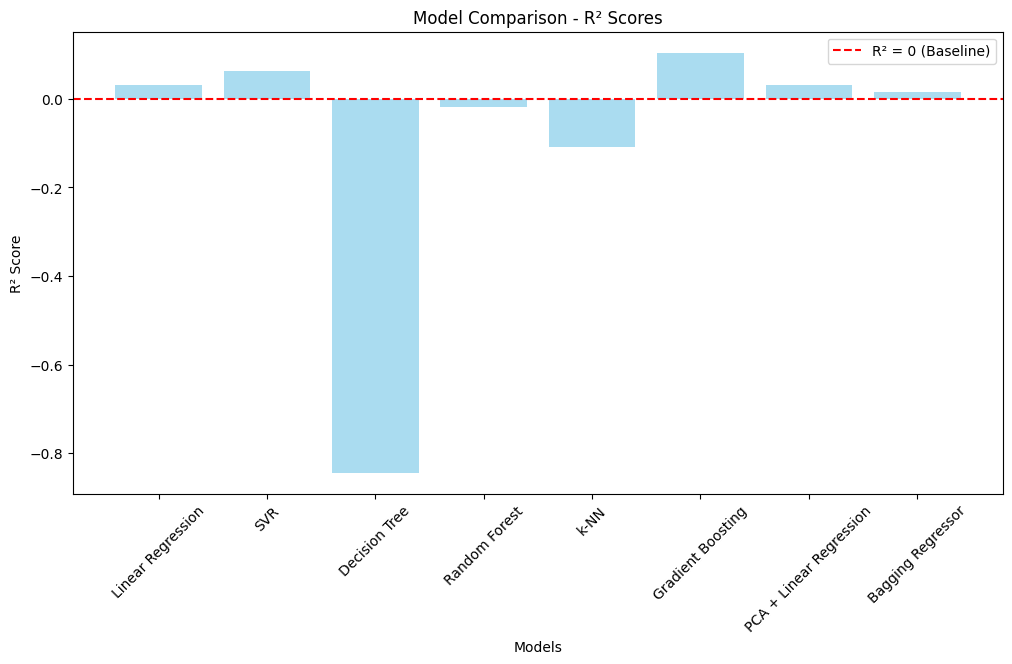

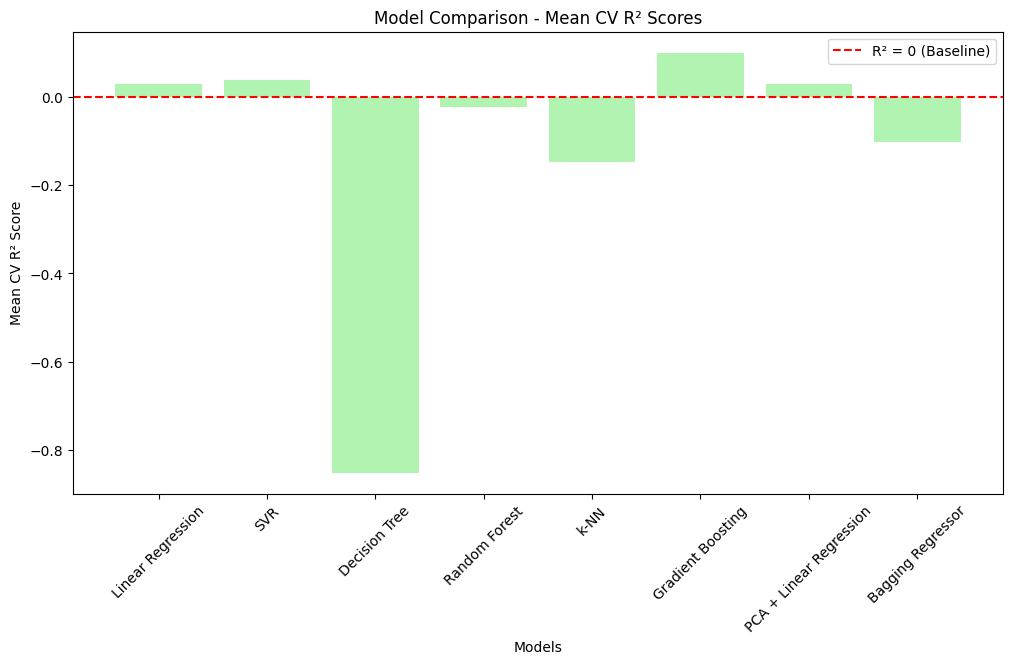

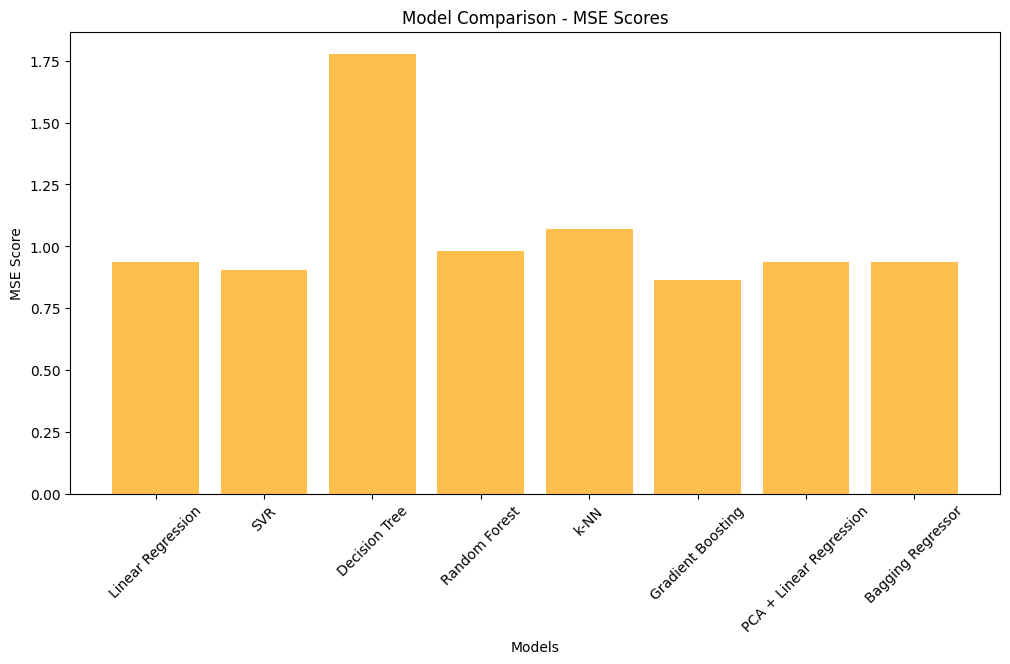

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
models = [
    "Linear Regression", "SVR", "Decision Tree", 
    "Random Forest", "k-NN", "Gradient Boosting", 
    "PCA + Linear Regression", "Bagging Regressor"
]

r2_scores = [0.0307, 0.0620, -0.8442, -0.0178, -0.1089, 0.1046, 0.0307, 0.0167]
mean_cv_scores = [0.0284, 0.0384, -0.8511, -0.0226, -0.1481, 0.0996, 0.0284, -0.1020]
mse_scores = [0.9351, 0.9049, 1.7791, 0.9819, 1.0698, 0.8639, 0.9351, 0.9351]

# Plotting R² Scores
plt.figure(figsize=(12, 6))
plt.bar(models, r2_scores, color='skyblue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', label="R² = 0 (Baseline)")
plt.title("Model Comparison - R² Scores")
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plotting Mean CV Scores
plt.figure(figsize=(12, 6))
plt.bar(models, mean_cv_scores, color='lightgreen', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', label="R² = 0 (Baseline)")
plt.title("Model Comparison - Mean CV R² Scores")
plt.xlabel("Models")
plt.ylabel("Mean CV R² Score")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plotting MSE Scores
plt.figure(figsize=(12, 6))
plt.bar(models, mse_scores, color='orange', alpha=0.7)
plt.title("Model Comparison - MSE Scores")
plt.xlabel("Models")
plt.ylabel("MSE Score")
plt.xticks(rotation=45)
plt.show()

# Time Series Analysis

In [65]:
# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as the index
df_time = df.set_index('Date')

# Sort the dataset by Date
df_time = df_time.sort_index()

# Check the time-series data
print(df_time.head())

               Close    Volume  Dividends  Stock_Splits  Month  Day  \
Date                                                                  
2002-08-12 -1.073888 -1.534237        0.0           0.0      1   12   
2002-08-13 -1.074419 -1.563906        0.0           0.0      1   13   
2002-08-14 -1.077087 -1.229652        0.0           0.0      1   14   
2002-08-15 -1.077087 -1.640615        0.0           0.0      1   15   
2002-08-16 -1.077173 -1.235106        0.0           0.0      1   16   

            Day_of_Week  Is_Weekend  Stock_Split  
Date                                              
2002-08-12            1           0            0  
2002-08-13            3           0            0  
2002-08-14            4           0            0  
2002-08-15            2           0            0  
2002-08-16            0           0            0  


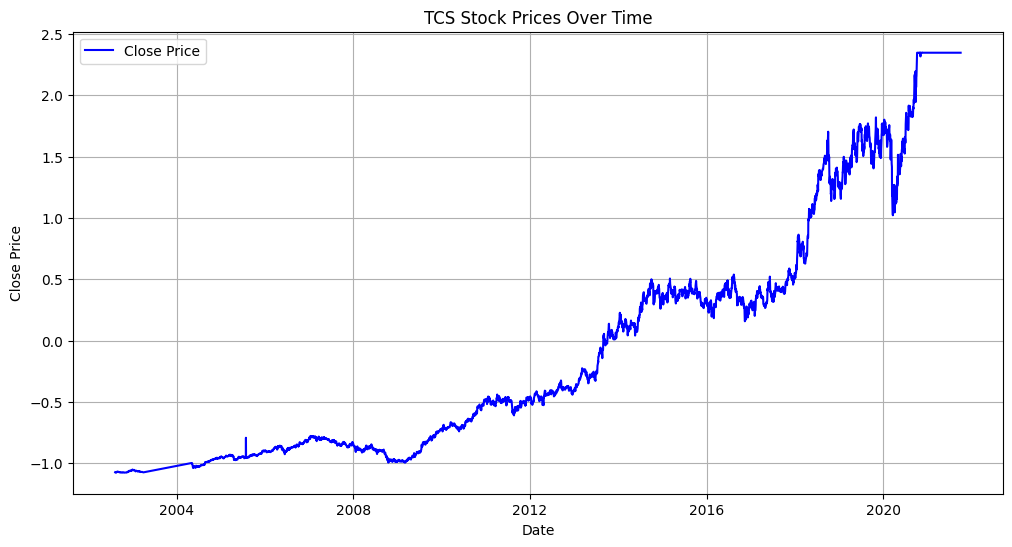

In [66]:
import matplotlib.pyplot as plt

# Plot the Close prices
plt.figure(figsize=(12, 6))
plt.plot(df_time['Close'], label='Close Price', color='blue')
plt.title('TCS Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

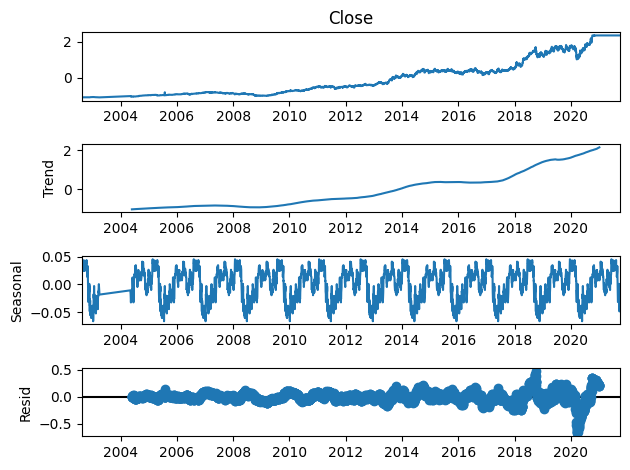

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decompose_result = seasonal_decompose(df_time['Close'], model='additive', period=365)

# Plot the decomposition
decompose_result.plot()
plt.show()

In [68]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
adf_test = adfuller(df_time['Close'])
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

if adf_test[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is NOT stationary.")

ADF Statistic: 1.7417544069731254
p-value: 0.9982262219364346
Critical Values: {'1%': -3.4318266626845793, '5%': -2.8621925067885026, '10%': -2.5671173333203963}
The time series is NOT stationary.


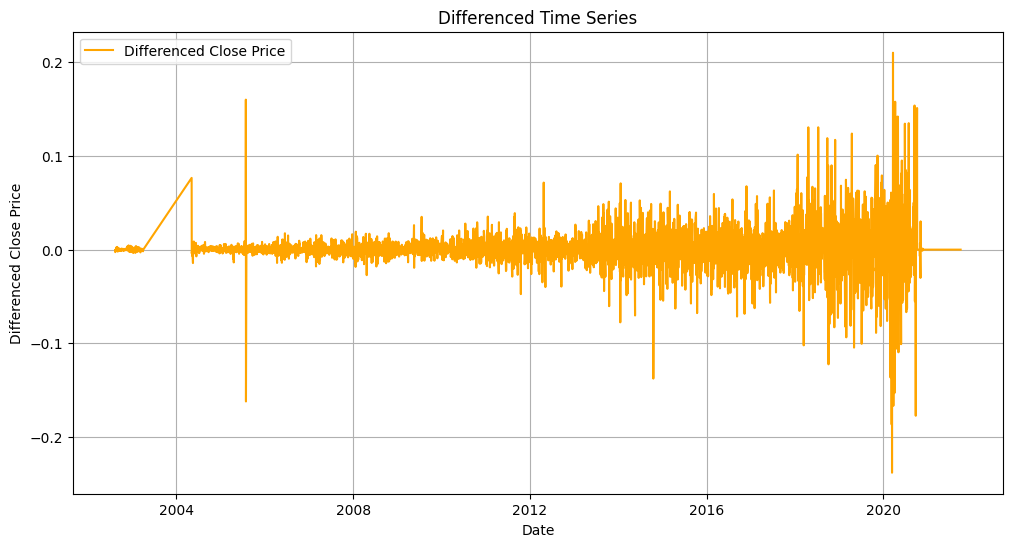

In [69]:
# Differencing the data to make it stationary
df_time['Close_diff'] = df_time['Close'].diff()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(df_time['Close_diff'], label='Differenced Close Price', color='orange')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.grid()
plt.show()

In [70]:
# Split data into training and testing sets
train_size = int(len(df_time) * 0.8)
train = df_time.iloc[:train_size]
test = df_time.iloc[train_size:]

print("Training Set:", train.shape)
print("Testing Set:", test.shape)

Training Set: (3570, 10)
Testing Set: (893, 10)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3570
Model:                 ARIMA(1, 1, 1)   Log Likelihood               10213.789
Date:                Thu, 13 Feb 2025   AIC                         -20421.578
Time:                        07:50:17   BIC                         -20403.038
Sample:                             0   HQIC                        -20414.968
                               - 3570                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0905      0.912     -0.099      0.921      -1.878       1.697
ma.L1          0.0772      0.912      0.085      0.932      -1.710       1.864
sigma2         0.0002   1.56e-06    122.742      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


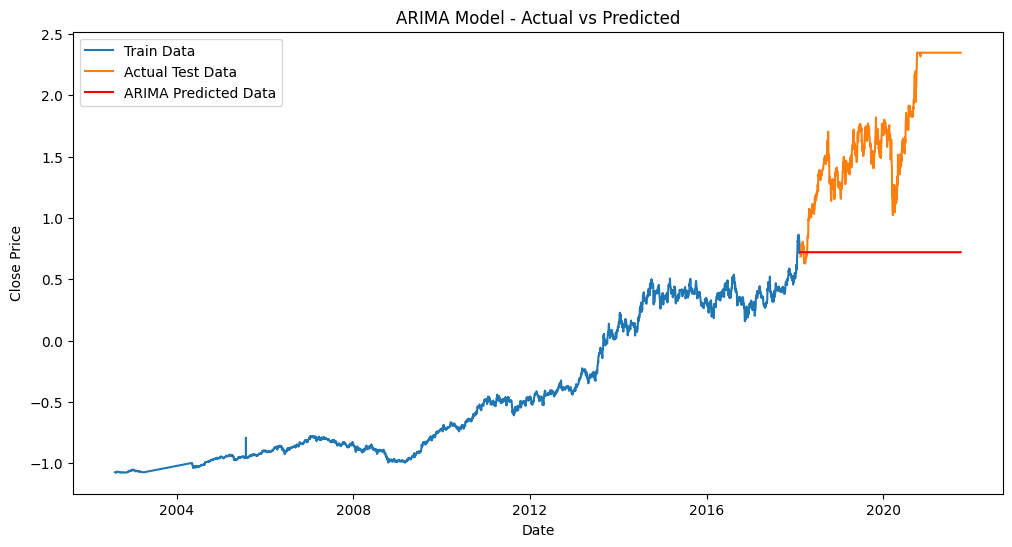

In [71]:
from statsmodels.tsa.arima.model import ARIMA

# Train the ARIMA model (use p, d, q values)
model_arima = ARIMA(train['Close'], order=(1, 1, 1))  # Adjust p, d, q based on analysis
arima_result = model_arima.fit()

# Print model summary
print(arima_result.summary())

# Forecast on the test set
forecast_arima = arima_result.forecast(steps=len(test))
test['ARIMA_Predicted'] = forecast_arima.values

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train Data')
plt.plot(test['Close'], label='Actual Test Data')
plt.plot(test['ARIMA_Predicted'], label='ARIMA Predicted Data', color='red')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3570
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               10153.245
Date:                            Thu, 13 Feb 2025   AIC                         -20296.490
Time:                                    07:50:47   BIC                         -20265.607
Sample:                                         0   HQIC                        -20285.478
                                           - 3570                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3240      0.729      0.444      0.657      -1.105       1.753
ma.L1         -0.3371      0.728   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


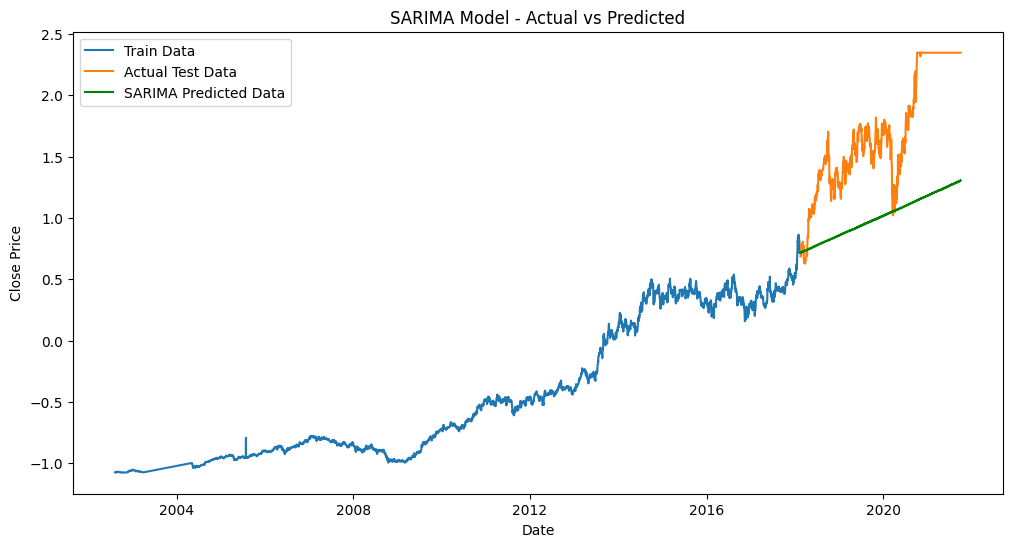

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train the SARIMA model (adjust seasonal order based on seasonality analysis)
model_sarima = SARIMAX(train['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = model_sarima.fit()

# Print model summary
print(sarima_result.summary())

# Forecast on the test set
forecast_sarima = sarima_result.forecast(steps=len(test))
test['SARIMA_Predicted'] = forecast_sarima.values

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train Data')
plt.plot(test['Close'], label='Actual Test Data')
plt.plot(test['SARIMA_Predicted'], label='SARIMA Predicted Data', color='green')
plt.title('SARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [74]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 13.3/13.3 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 94.5/94.5 kB 5.6 MB/s eta 0:00:00
     -------------------------------------- 791.2/791.2 kB 5.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


07:52:17 - cmdstanpy - INFO - Chain [1] start processing
07:52:20 - cmdstanpy - INFO - Chain [1] done processing


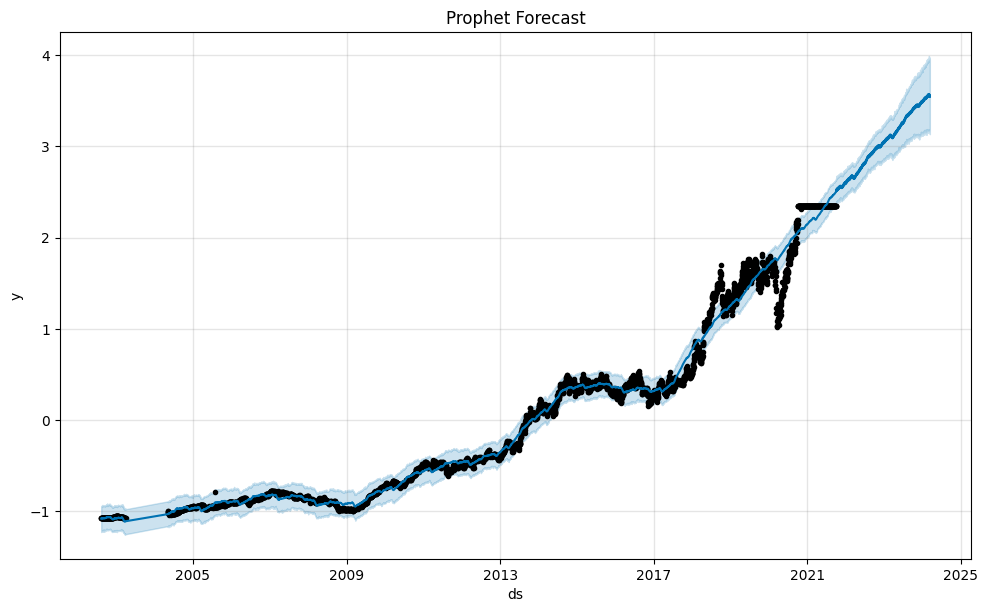

In [75]:
from prophet import Prophet

# Prepare data for Prophet
prophet_data = df_time.reset_index()[['Date', 'Close']]
prophet_data.columns = ['ds', 'y']  # Rename columns for Prophet

# Train the model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Make future dataframe
future = prophet_model.make_future_dataframe(periods=len(test), freq='D')

# Forecast
forecast_prophet = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast_prophet)
plt.title('Prophet Forecast')
plt.show()

# Add forecast to test data
test['Prophet_Predicted'] = forecast_prophet['yhat'].iloc[-len(test):].values

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f"{model_name} Evaluation:")
    print("MAE:", mae)
    print("RMSE:", rmse)
    print()

# Evaluate each model
evaluate_model(test['Close'], test['ARIMA_Predicted'], "ARIMA")
evaluate_model(test['Close'], test['SARIMA_Predicted'], "SARIMA")
evaluate_model(test['Close'], test['Prophet_Predicted'], "Prophet")

ARIMA Evaluation:
MAE: 0.9760681674160682
RMSE: 1.0851675666937641

SARIMA Evaluation:
MAE: 0.6878212967836095
RMSE: 0.7620305142869214

Prophet Evaluation:
MAE: 1.3375037490227935
RMSE: 1.3578021812128256



#### FROM THE EVALUATION RESULTS : 
* SARIMA performed the best, with the lowest MAE (0.6878) and RMSE (0.7620), indicating it’s the most accurate model for forecasting in this case.
* ARIMA is the second-best, though its errors are slightly higher than SARIMA.
* Prophet didn’t perform well, with the highest MAE (1.3375) and RMSE (1.3578), meaning it struggled to capture the patterns in the data.

# Fine-Tune the SARIMA Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


SARIMA (Tuned) Evaluation:
MAE: 0.7281593601723693
RMSE: 0.8068307319950223



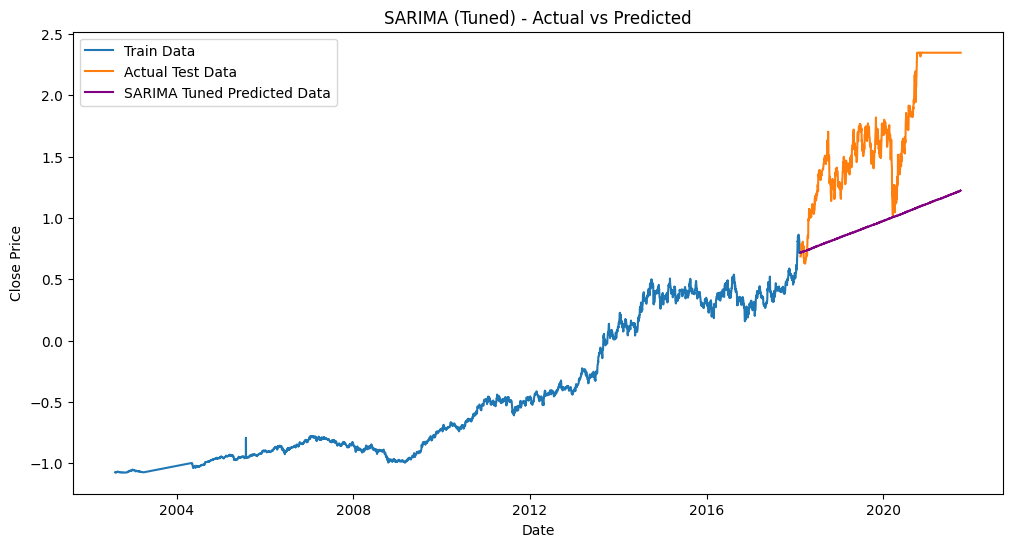

In [77]:
# Fine-tune SARIMA (try different orders)
model_sarima_tuned = SARIMAX(train['Close'], order=(2, 1, 2), seasonal_order=(2, 1, 2, 12))
sarima_result_tuned = model_sarima_tuned.fit()

# Evaluate the tuned model
forecast_sarima_tuned = sarima_result_tuned.forecast(steps=len(test))
test['SARIMA_Tuned_Predicted'] = forecast_sarima_tuned.values

# Evaluation of the tuned model
evaluate_model(test['Close'], test['SARIMA_Tuned_Predicted'], "SARIMA (Tuned)")

# Plot the tuned model predictions
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train Data')
plt.plot(test['Close'], label='Actual Test Data')
plt.plot(test['SARIMA_Tuned_Predicted'], label='SARIMA Tuned Predicted Data', color='purple')
plt.title('SARIMA (Tuned) - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [78]:
import joblib

# Save the SARIMA model
joblib.dump(sarima_result, 'sarima_model.pkl')

# Load the saved model for future predictions
sarima_model_loaded = joblib.load('sarima_model.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


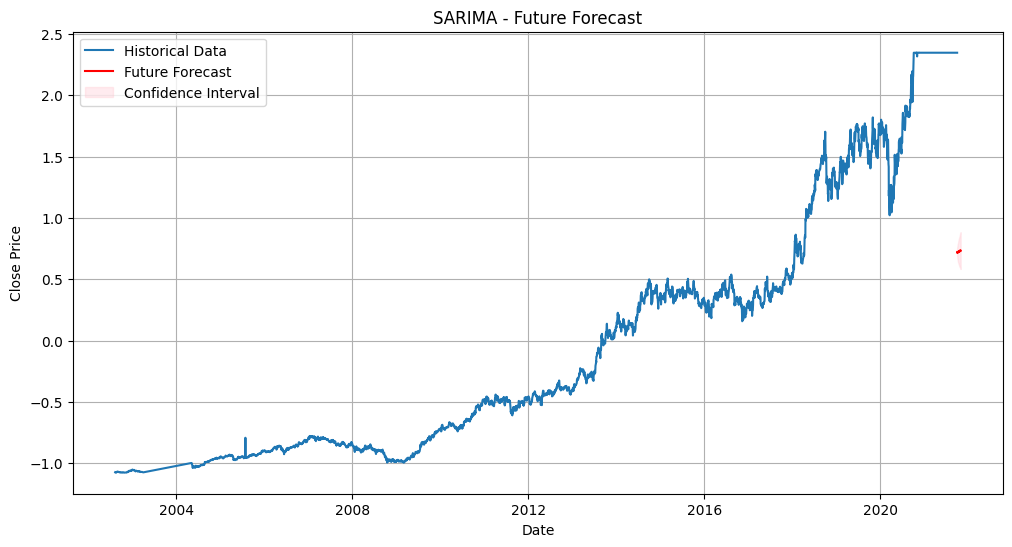

In [79]:
# Predict the next 30 days
future_forecast = sarima_result.get_forecast(steps=30)
future_index = pd.date_range(start=test.index[-1], periods=30, freq='D')
future_forecast_df = future_forecast.conf_int(alpha=0.05)  # Confidence intervals
future_forecast_df['Forecast'] = future_forecast.predicted_mean
future_forecast_df.index = future_index

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(df_time['Close'], label='Historical Data')
plt.plot(future_forecast_df['Forecast'], label='Future Forecast', color='red')
plt.fill_between(
    future_forecast_df.index,
    future_forecast_df['lower Close'],
    future_forecast_df['upper Close'],
    color='pink',
    alpha=0.3,
    label='Confidence Interval',
)
plt.title('SARIMA - Future Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

## Bagging Regression Performance:

* R² = 0.1046 → Indicates that the model explains only ~10.46% of the variance in the data, which is quite low.
* MSE = 0.8639 → Measures the average squared error; higher values indicate poorer performance.
* Mean CV R² = 0.0996 → Confirms poor generalization performance in cross-validation.

##### Insight: Bagging Regression is not performing well for this dataset, likely due to insufficient feature correlation with the target variable or lack of non-linear relationships for Bagging to exploit.

## SARIMA Performance:
* MAE = 0.6878 → The average absolute error is lower, indicating better accuracy in predictions.
* RMSE = 0.7620 → Lower root mean squared error compared to Bagging Regression, meaning the SARIMA model handles sequential stock price forecasting better.

##### Insight: SARIMA captures temporal patterns, making it more suitable for this task, where historical trends and seasonality play a significant role in stock price prediction.